**<h1><center>House Price Prediction</center></h1>**

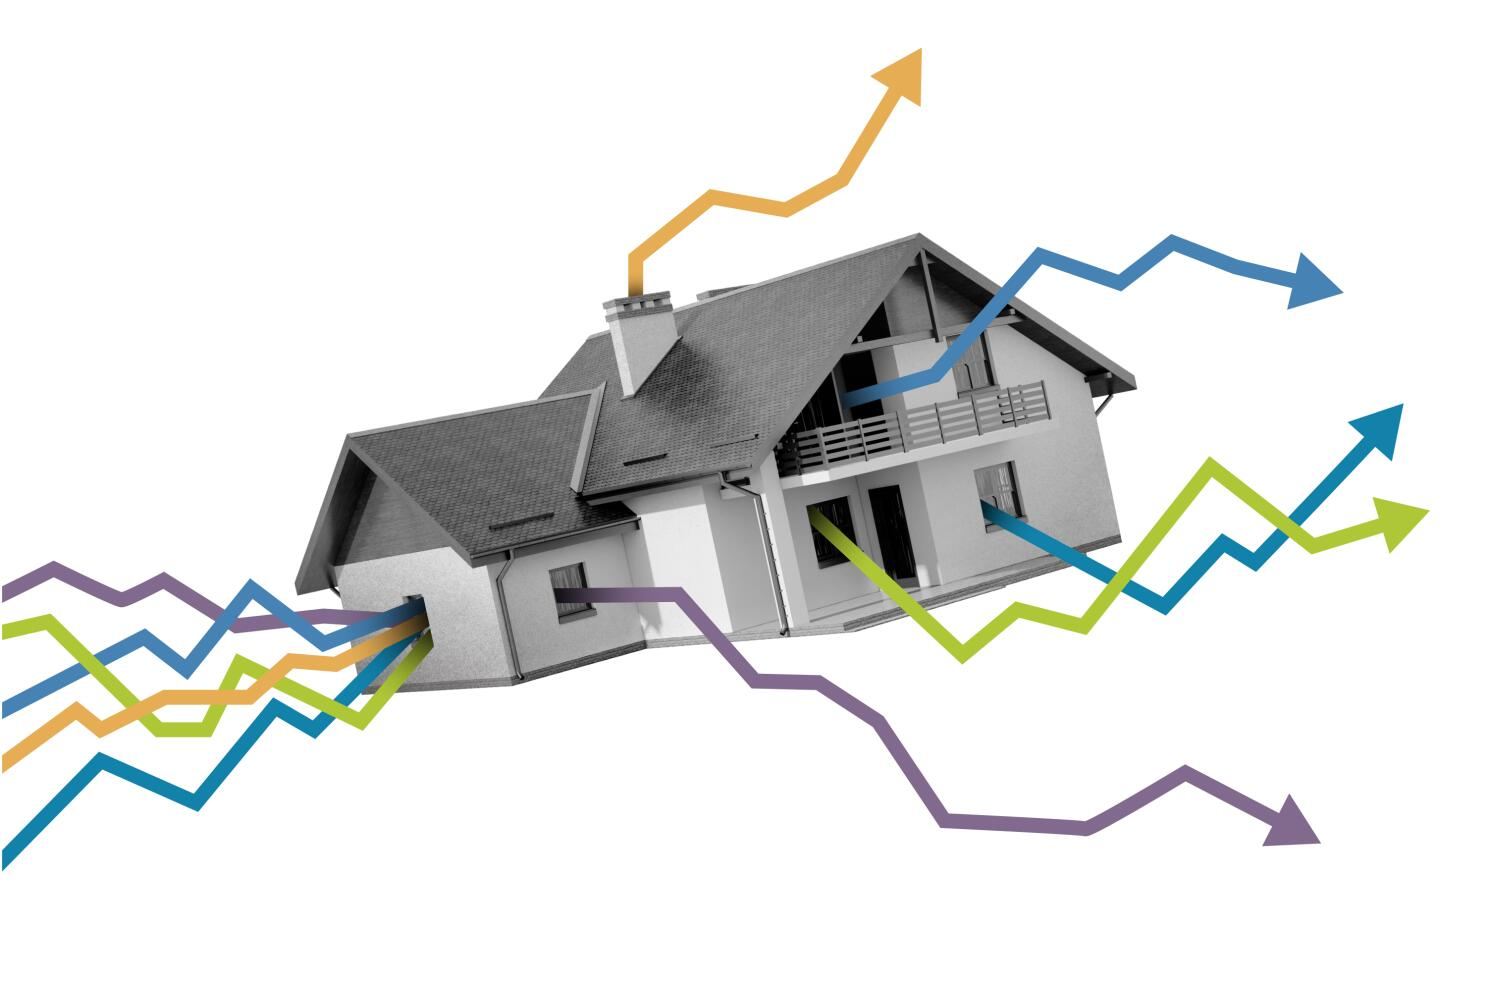

In [3]:

from IPython.display import Image,Markdown, display #importing the cover image
image_path = "Cover.jpeg"
# Display the image
Image(filename=image_path)

### Table Of Content
* 1 Introduction
* 2 Libraries & Configuration
  * 2.1 Libraries
  * 2.2 Configuration
* 3 Data Wrangling
  * 3.1 Data Validation
  * 3.2 Data cleaning
* 4 EXploratory Data Analysis
  * 4.1 Univariate Analysis
  * 4.2 Bivariate/ multivariate analysis
  * 4.3 insights
* 5 Model fitting and Evaluation
  * 5.1 Data Pre-processing
  * 5.2 Linear Regression
  * 5.3 Random Forest
  * 5.4 Xgboost 

* 6 Businesss Insights

  

 
# 1.0 Introduction:

The real estate market is complex and dynamic, with numerous factors influencing the prices of homes. Understanding these factors and accurately predicting house prices is crucial for buyers, sellers, real estate agents, and investors. Our House Price Prediction Model is designed to provide reliable price estimates for homes based on a comprehensive set of features.

### Problem Statement:
Accurately predicting house prices is a critical challenge in the real estate market, influenced by a multitude of factors including dwelling types, zoning classifications, lot features, property conditions, and sale conditions. Traditional methods of property valuation often rely on limited data and subjective assessments, leading to inconsistencies and inaccuracies. This creates uncertainty for various stakeholders such as home buyers, sellers, real estate agents, and investors, potentially resulting in financial losses and inefficient market operations.


### Objective:
To address these challenges, our goal is to develop a robust House Price Prediction Model that leverages advanced machine learning techniques to analyze a comprehensive set of property features and market data with an accuracy target of 85%. This model aims to provide accurate, data-driven price predictions that can be used by various stakeholders to make informed decisions in the real estate market.


### In this notebook, we aim to answer several Key Questions for Gaining Insights into House prices:

#### General Questions

1. **What is the distribution of house prices?**
   - Understanding the overall spread, central tendency, and any outliers in house prices.

#### Location and Proximity

2. **How does the physical location (Neighborhood) within the city and Zoning influence house prices?**
   - Comparing house prices across different neighborhoods to identify high and low-value areas.

   - Investigating the relationship between different zoning classifications (e.g., residential, commercial) and house prices.

4. **How do proximity features (Condition1, Condition2) affect house prices?**
   - Determining how proximity to various conditions (e.g., arterial streets, railroads, parks) impacts house prices.

#### Feature-Specific Questions

5. **What is the impact of dwelling type (MSSubClass) on house prices?**
   - Analyzing how different types of dwellings (e.g., 1-story, 2-story, duplex) affect house prices.

6. **How does the condition and quality of the house (OverallCond) impact house prices?**
   - Assessing how the overall quality and condition ratings of a house influence its price.

7. **How do different Foundation type relate to house prices?**
    - Examining how foundation types affect house prices.

8. **What is the impact of basement features (e.g., TotalBsmtSF, BsmtQual, BsmtCond) on house prices?**
    - Analyzing how basement size, quality, and condition correlate with house prices.

9. **How do living area features (e.g., GrLivArea) influence house prices?**
    - Investigating the relationship between the total living area and house prices.

10. **How do amenities such as garages (GarageType) impact house prices?**
    - Determining the value added by amenities like  garages.

#### Sale type and Sale Conditions

11. **How do sale type (SaleType) and sale condition (SaleCondition) affect house prices?**
    - Analyzing the influence of different sale types (e.g., warranty deed, cash sale) and sale conditions on house prices.

### Time specific Questions
12. **What is the effect of the year built (YearBuilt) and year remodeled (YearRemodAdd) on house prices?**
   - Analyzing whether newer houses fetch higher prices.

13. **What is the impact of the time of sale (MoSold) on house prices?**
    - Investigating seasonal trends and changes in house prices over time.


By answering these questions through visualizations and statistical analyses during the EDA, i can uncover important insights and relationships that will help inform the house price prediction model.


### Data Sources:

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

* <a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview" target="_blank">
    <img src="https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white" alt="Kaggle">
 </a>


### This project also serves as a capstone project for the Data Science Diploma at AltSchool.
* [Alt school Data science](https://altschoolafrica.com/)

### GitHub Project Repository :
* [House Price Prediction](https://github.com/SaliuA/Housing-Price-Prediction)

### Summary :
I applied Linear Regression, Random Forest Regressor, and XGBoost models to the dataset. Among these, XGBoost achieved the lowest RMSE of $23,000 and the highest R-squared of 0.9.

### Built With




# 2 Libraries & Configurations

### 2.1 Libraries
Loading the relevant libraries and user-defined functions

In [4]:
"""importing relevant libraries"""
import pandas as pd  # for data manipulation
import numpy as np   # for data computation
import matplotlib.pyplot as plt #for 2D data visualization
import seaborn as sns    #for 2D data visualization
import altair as alt    #altair for declarative statistical visualization
from scipy import stats     # for statistics
import seaborn as sns # for visualization
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.linear_model import LinearRegression #base linear regression model
from sklearn.ensemble import RandomForestRegressor #Esemble linear regression model
import xgboost as xgb #boosting type of ensemble machine learning model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #evaluation metrics
from sklearn.model_selection import GridSearchCV #hyperparameter selection
from sklearn.model_selection import cross_val_score #cross validation 
from math import sqrt #commupation
from sklearn.feature_selection import RFE #feature importance

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))

#function to evaluate model perfomance
def evaluate_model(y_true, y_pred):
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    
    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)    
    # Calculate R-squared (R²)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    
    return mse, rmse, r2

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### 2.2 Configurations
Setting the configurations to be used for our analysis.

In [6]:
# seed value
SEED = 42
#set seaborn theme
sns.set_theme(style="darkgrid", palette="colorblind")
#displaying all columns
pd.set_option('display.max_columns', None)


# 3. Data Wrangling
This data set has 1460 rows and 81 columns consisting of both numeric and categorical features.


In [ ]:
#loading the dataframe
df= pd.read_csv('train.csv')
#viewing the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

### 3.1 Data Validation
The id colunm was dropped for being a unique identifer

In [ ]:
#cheking information on the all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#checking statistical information about the numeric colunms
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print unique values for each categorical column
for col in categorical_columns:
    printmd(f'#### {col}:\n - {df[col].unique()}')

#### MSZoning:
 - ['RL' 'RM' 'C (all)' 'FV' 'RH']

#### Street:
 - ['Pave' 'Grvl']

#### Alley:
 - [nan 'Grvl' 'Pave']

#### LotShape:
 - ['Reg' 'IR1' 'IR2' 'IR3']

#### LandContour:
 - ['Lvl' 'Bnk' 'Low' 'HLS']

#### Utilities:
 - ['AllPub' 'NoSeWa']

#### LotConfig:
 - ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

#### LandSlope:
 - ['Gtl' 'Mod' 'Sev']

#### Neighborhood:
 - ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

#### Condition1:
 - ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

#### Condition2:
 - ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

#### BldgType:
 - ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

#### HouseStyle:
 - ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

#### RoofStyle:
 - ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

#### RoofMatl:
 - ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']

#### Exterior1st:
 - ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']

#### Exterior2nd:
 - ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']

#### MasVnrType:
 - ['BrkFace' nan 'Stone' 'BrkCmn']

#### ExterQual:
 - ['Gd' 'TA' 'Ex' 'Fa']

#### ExterCond:
 - ['TA' 'Gd' 'Fa' 'Po' 'Ex']

#### Foundation:
 - ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']

#### BsmtQual:
 - ['Gd' 'TA' 'Ex' nan 'Fa']

#### BsmtCond:
 - ['TA' 'Gd' nan 'Fa' 'Po']

#### BsmtExposure:
 - ['No' 'Gd' 'Mn' 'Av' nan]

#### BsmtFinType1:
 - ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']

#### BsmtFinType2:
 - ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

#### Heating:
 - ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']

#### HeatingQC:
 - ['Ex' 'Gd' 'TA' 'Fa' 'Po']

#### CentralAir:
 - ['Y' 'N']

#### Electrical:
 - ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]

#### KitchenQual:
 - ['Gd' 'TA' 'Ex' 'Fa']

#### Functional:
 - ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']

#### FireplaceQu:
 - [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']

#### GarageType:
 - ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']

#### GarageFinish:
 - ['RFn' 'Unf' 'Fin' nan]

#### GarageQual:
 - ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']

#### GarageCond:
 - ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']

#### PavedDrive:
 - ['Y' 'N' 'P']

#### PoolQC:
 - [nan 'Ex' 'Fa' 'Gd']

#### Fence:
 - [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

#### MiscFeature:
 - [nan 'Shed' 'Gar2' 'Othr' 'TenC']

#### SaleType:
 - ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']

#### SaleCondition:
 - ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']

In [ ]:
#dropping redundant Id column becuase it is a unique identifier
df.drop(['Id'],axis=1,inplace=True)

### 3.2 Data Cleaning

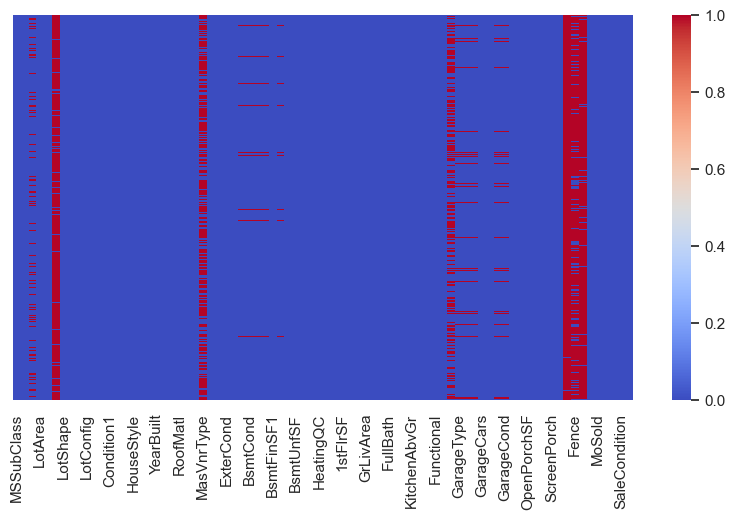

In [ ]:
#Checking for missing values before cleaning
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(),cmap='coolwarm',yticklabels=False)
plt.show()

In [ ]:
#checking for missing data
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data != 0]
missing_data=missing_data.reset_index().sort_values(0,ascending=False)
missing_data.rename(columns={'index': 'Columns', 0: 'Missing values'}, inplace=True)
missing_data['missing value percentage']= round(missing_data['Missing values']*100/len(df),2)
missing_data


,Columns,Missing values,missing value percentage
16,PoolQC,1453,99.52
18,MiscFeature,1406,96.30
1,Alley,1369,93.77
17,Fence,1179,80.75
2,MasVnrType,872,59.73
10,FireplaceQu,690,47.26
0,LotFrontage,259,17.74
11,GarageType,81,5.55
12,GarageYrBlt,81,5.55
13,GarageFinish,81,5.55


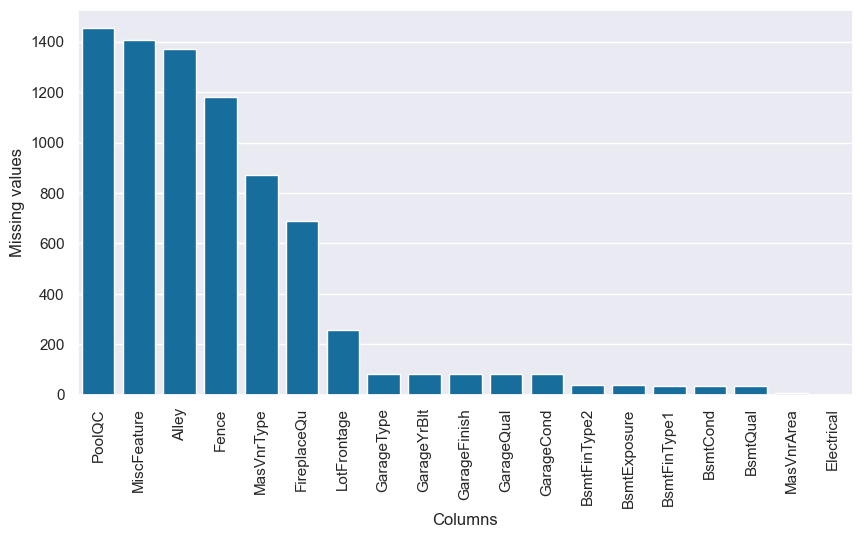

In [ ]:
#visualizing the missing values
#plot Missing values
plt.figure(figsize=(10, 5))
sns.barplot(x='Columns', y='Missing values', data=missing_data)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Droping columns with more than 60% missing values to avoid inputational bias
threshold = 60
columns_to_drop = missing_data[missing_data['missing value percentage'] >= threshold]['Columns'].tolist()
df.drop(columns=columns_to_drop, inplace=True)

#### 3.2.1 Filling missing values

- MasVnrType, MasVnrArea Column

In [ ]:
#Exploring the pattern of the missing data
df[df['MasVnrType'].isnull()].sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
687,160,FV,NaN,5105,Pave,IR2,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,239,Unf,0,312,551,GasA,Ex,Y,SBrkr,551,551,0,1102,0,0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2004.0,Unf,2,480,TA,TA,Y,0,60,0,0,0,0,0,3,2007,WD,Normal,148800
896,30,RM,50.0,8765,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,6,1936,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,285,Unf,0,666,951,GasA,Ex,N,SBrkr,951,0,0,951,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1936.0,Unf,1,327,TA,TA,Y,0,28,0,0,0,0,0,4,2006,WD,Abnorml,106500
1069,45,RL,60.0,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Unf,5,7,1949,2003,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,220,Unf,0,625,845,GasA,TA,Y,SBrkr,893,0,0,893,0,1,1,0,2,1,Gd,4,Typ,0,NaN,Detchd,1985.0,Unf,2,576,TA,TA,Y,0,0,0,0,0,0,0,5,2007,WD,Normal,135000
1246,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,756,756,GasA,Ex,Y,SBrkr,756,797,0,1553,0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2005.0,RFn,2,615,TA,TA,Y,0,45,0,0,0,0,0,3,2006,New,Partial,186500
921,90,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,Duplex,1.5Fin,5,7,1900,2003,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1084,Unf,0,188,1272,GasA,Gd,Y,SBrkr,1272,928,0,2200,2,0,2,2,4,2,TA,9,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,70,0,0,0,0,0,9,2008,WD,Normal,145900


In [ ]:
#Exploring the pattern of the missing data
df[df['MasVnrArea'].isnull()].sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
977,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,Partial,199900
650,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal,205950
973,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial,182000
234,60,RL,NaN,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,0,5,2010,WD,Normal,216500
936,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,Normal,184900


In [ ]:
#checking rows where MasVnrArea exist but MasVnrType is missing
df[(df['MasVnrType'].isnull())&(df['MasVnrArea'] > 0) ]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,60,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,NaN,288.0,TA,TA,CBlock,TA,TA,No,Rec,247,Unf,0,485,732,GasA,Gd,Y,SBrkr,1012,778,0,1790,1,0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2,484,TA,TA,Y,148,0,0,0,147,0,0,11,2006,WD,Normal,165150
773,20,RL,70.0,10150,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,1.0,TA,TA,CBlock,TA,TA,No,Rec,456,Unf,0,456,912,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1,275,TA,TA,Y,0,0,0,0,0,0,0,7,2007,COD,Normal,114500
1230,90,RL,NaN,18890,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,NaN,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,8300,8,2007,WD,Normal,190000
1300,60,RL,NaN,10762,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,NaN,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694,Unf,0,284,978,GasA,Ex,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2,490,TA,TA,Y,0,0,0,0,0,0,0,5,2009,WD,Normal,225000
1334,160,RM,24.0,2368,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,NaN,312.0,TA,TA,CBlock,TA,TA,No,LwQ,765,Unf,0,0,765,GasA,TA,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1970.0,Unf,2,440,TA,TA,Y,0,36,0,0,0,0,0,5,2009,WD,Normal,125000


In [ ]:
#dropping rows were MasVnrArea is exist bt MasVnrType is Nan 
df=df[~((df['MasVnrType'].isnull())&(df['MasVnrArea'] > 0))]
#MasVnrType is missing were MasVnrArea is 0 indicating Masonry veneer type is None , filling wth None
df['MasVnrType'].fillna('None',inplace=True)
#MasVnrArea is missing where MasVnrType is is None, filling iwth 0
df['MasVnrArea'].fillna(int((0)),inplace=True)

- FireplaceQu column

In [ ]:
#Exploring the pattern of the missing data
df[df['FireplaceQu'].isnull()].sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
615,85,RL,80.0,8800,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,SFoyer,6,7,1963,1963,Gable,CompShg,MetalSd,MetalSd,BrkFace,156.0,TA,Gd,PConc,TA,TA,Gd,GLQ,763,Unf,0,173,936,GasA,Ex,Y,SBrkr,1054,0,0,1054,1,0,1,0,3,1,Gd,6,Typ,0,NaN,Attchd,1963.0,RFn,2,480,TA,TA,Y,120,0,0,0,0,0,0,5,2010,WD,Abnorml,137500
1234,70,RH,55.0,8525,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2Story,5,6,1911,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,Av,Unf,0,Unf,0,940,940,GasA,TA,N,FuseA,1024,940,0,1964,0,0,1,1,4,1,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,192,0,0,0,0,0,11,2008,WD,Abnorml,130000
1246,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,756,756,GasA,Ex,Y,SBrkr,756,797,0,1553,0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2005.0,RFn,2,615,TA,TA,Y,0,45,0,0,0,0,0,3,2006,New,Partial,186500
831,160,FV,30.0,3180,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,600,600,GasA,Ex,Y,SBrkr,520,600,80,1200,0,0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2005.0,RFn,2,480,TA,TA,Y,0,166,0,0,0,0,0,6,2006,WD,Normal,151000
1418,20,RL,71.0,9204,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25,Rec,872,247,1144,GasA,TA,Y,SBrkr,1144,0,0,1144,1,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1962.0,Unf,1,336,TA,TA,Y,0,88,0,0,0,0,0,8,2008,COD,Normal,124000


In [ ]:
#FireplaceQu is missing were Fireplaces is 0 indicating there are no fireplaces, filling wth None
df['FireplaceQu'].fillna('None',inplace=True)

- LotFrontage column

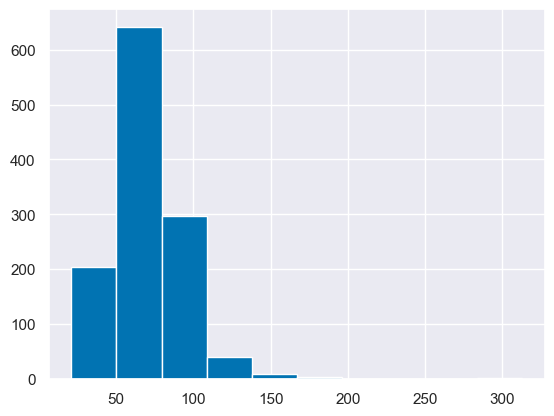

In [ ]:
#observing the distribution of LotFrontage 
df['LotFrontage'].hist()
plt.show()

In [ ]:
#Due to the skewness of LotFrontage, flling with the median value would be more appropriate grouped by Zones
df['LotFrontage'] = df.groupby("MSZoning")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

- GarageType, GarageFinish, GarageQual, GarageCond 

In [ ]:
#GarageType, GarageFinish, GarageQual and GarageCond replacing with None for buildings without garages
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    df[col] = df[col].fillna('None')

- GarageYrBlt, GarageArea and GarageCars 

In [ ]:
#GarageYrBlt replacing with zero for buildings without garages
df['GarageYrBlt'].fillna(int(0),inplace=True)

- BsmtFinType2, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual

In [ ]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual replacing with None for buildings without basements
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    df[col] = df[col].fillna('None')

- Electrical

In [ ]:
#filling the only missing value wit the most frequent value
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)

- Missing Values Post-cleaning

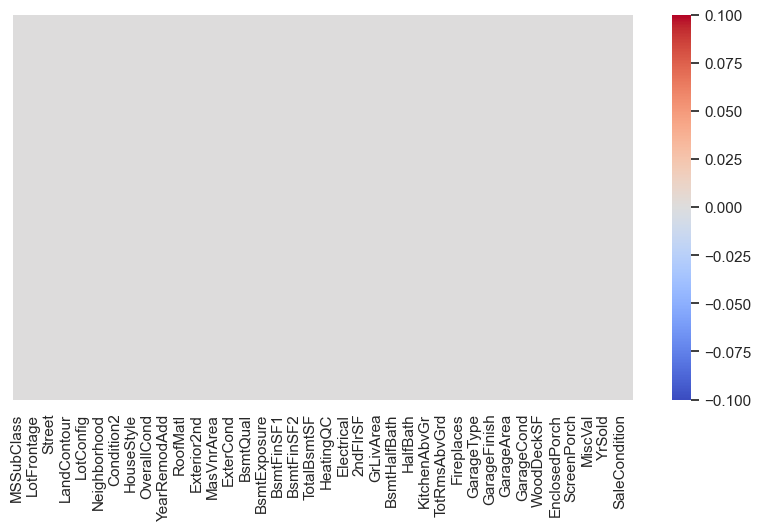

In [ ]:
#Checking for missing values after cleaning
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(),cmap='coolwarm',yticklabels=False)
plt.show()

In [ ]:
#checking the shape of the dataset
df.shape

(1455, 76)

The shape of the dataset after cleaning is 1,455 rows and 76 columns from a previous 1460 rows and 81 columns

# 4.0 Exploratory Data Analysis


## 4.1 Univariant Analysis

### 4.1.1 Target Variable- Sale Price

The variable 'Sale Price' is our target variable for predictive analysis. It represents the price of buildings that have been sold having various features

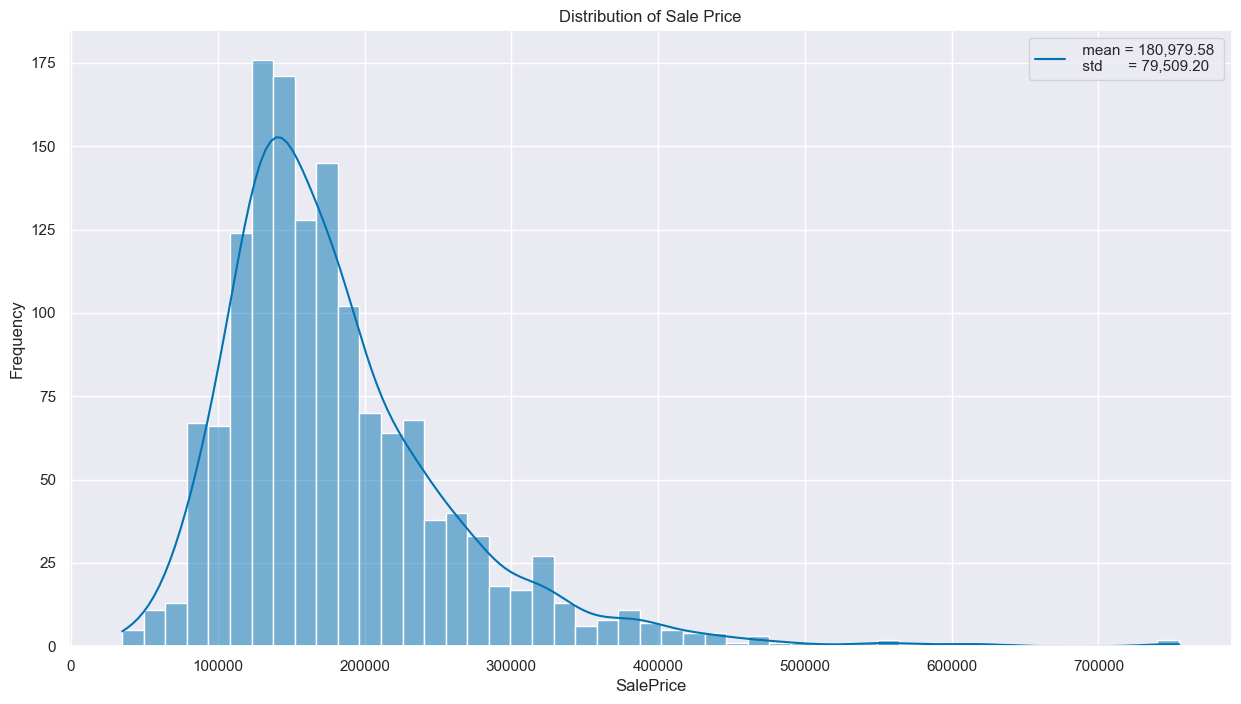

In [ ]:
plt.subplots(figsize=(15,8))
sns.histplot(df['SalePrice'],kde=True)

# obtaining the mean and std

(mean, std) = stats.norm.fit(df['SalePrice'])

# plot with the distribution

plt.legend([' mean = {:,.2f} \n std      = {:,.2f} '.format(mean, std)], loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()

The distribution is skewed to the right with a extreme values to the right

In [ ]:
df['SalePrice'].describe()

count      1455.00000
mean     180979.58488
std       79536.54149
min       34900.00000
25%      130000.00000
50%      163000.00000
75%      214000.00000
max      755000.00000
Name: SalePrice, dtype: float64

The minimum sale price is $34,900, while the maximum sale price is $755,000. The mean price is $180,979, and the median price is $163,000. The disparity between the mean and median is due to the right-skewed distribution of the data,because the median is resistant to data volatility, it provides a much better measurement of central tendency in this context.

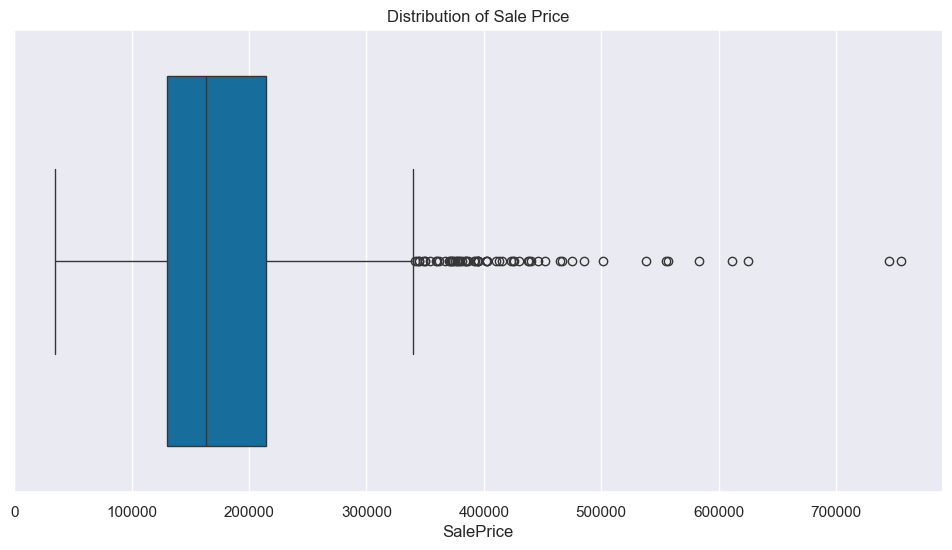

In [ ]:
#creating a box plot for further visualization of the sale price distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Distribution of Sale Price')
plt.show()

 The sale price has an approximate mean of  $180,921.20 with a standard deviation of $79,415.29. In summary, the box plot, in conjunction with the distribution plot, highlights that most house prices are concentrated below $200,000, with a significant number of outliers at higher prices, resulting in a right-skewed distribution. 
 This suggests a market with a majority of affordable houses and a smaller segment of very high-priced properties.

### 4.2 Bivariant and MultiVariant Analysis

### 4.2.1 Categorical Features


#### Location and Proximity Analysis

Comparing house prices across different neighborhoods and zones to identify high and low-value areas and also analysing the effect of proximity to certain features (rail roads, parks,greenbelt etc) on the sale price.

- Neighbourhoods



In [ ]:
#Obtaining house prices based on neighborhoods
df_location=df.groupby('Neighborhood')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_location
#median is a much more appropriate measure of center due to the skewness of the distribution

,Neighborhood,SalePrice
0,NridgHt,315000.0
1,NoRidge,301500.0
2,StoneBr,278000.0
3,Timber,228475.0
4,Somerst,225500.0
5,Veenker,218000.0
6,Crawfor,200624.0
7,ClearCr,200250.0
8,CollgCr,197200.0
9,Blmngtn,191000.0


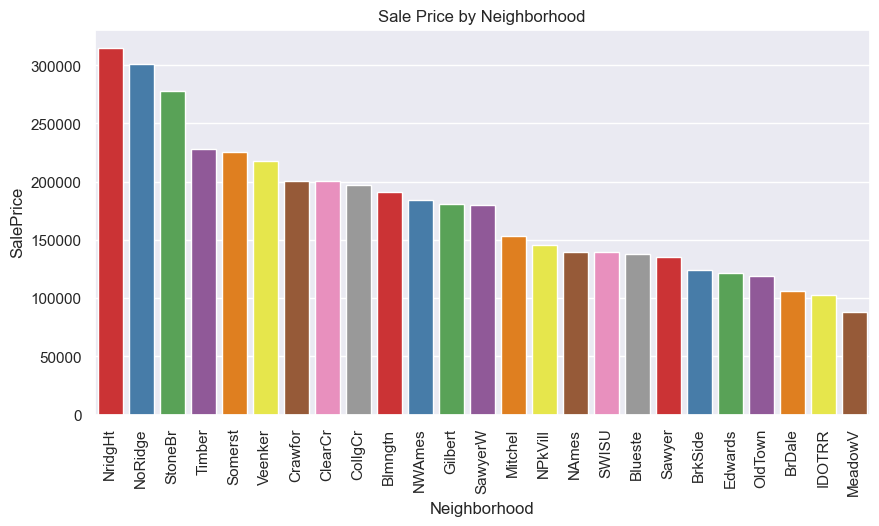

In [ ]:
#visualizing the house price by neighborhood
plt.figure(figsize=(10, 5))
sns.barplot(y='SalePrice', x='Neighborhood', hue='Neighborhood', data=df_location,palette='Set1')
plt.title('Sale Price by Neighborhood')
plt.xticks(rotation=90)

plt.show()

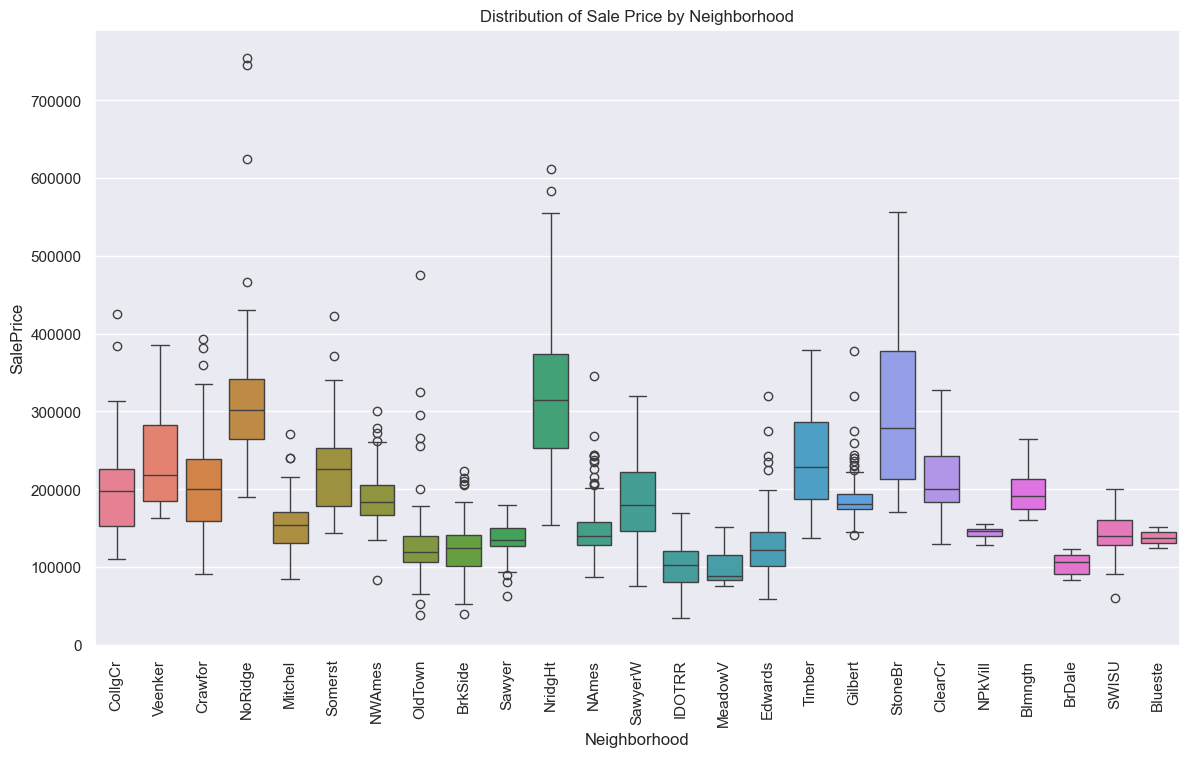

In [ ]:
#Exploring the distrubition of Sales prices by Neighbourhood via a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Neighborhood', y='SalePrice', hue='Neighborhood',legend=False)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Sale Price by Neighborhood')
plt.show()


High-Price Neighborhoods: NridgHt, NoRidge, and StoneBr consistently appear as high-price neighborhoods in both plots.

Low-Price Neighborhoods: MeadowV, IDOTRR, and BrDale are consistently lower in price.

Price Variability: Some neighborhoods show a wide range of house prices (e.g., NridgHt and Timber), while others have more consistent prices (e.g., SWISU and Blueste).

- Zones

comparing Sale prices across zones

In [ ]:
#Obtaining house prices based on Zones
df_zones=df.groupby('MSZoning')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_zones

,MSZoning,SalePrice
0,FV,205950.0
1,RL,174000.0
2,RH,136500.0
3,RM,120500.0
4,C (all),74700.0


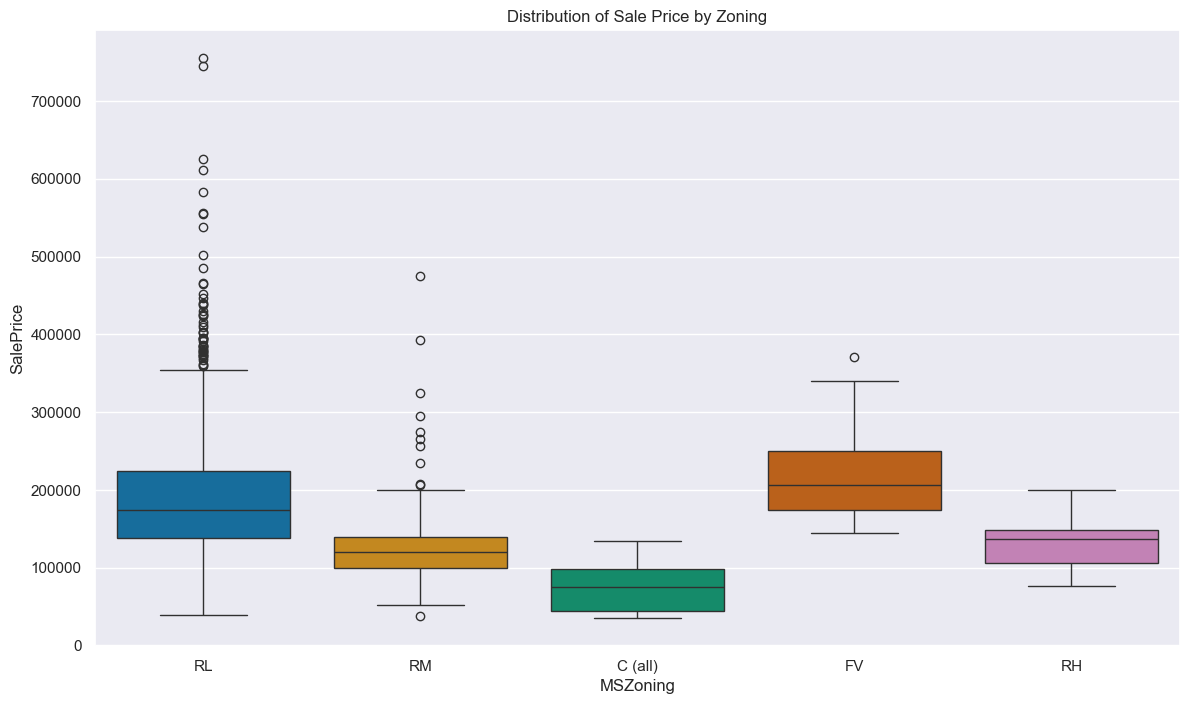

In [ ]:
#Exploring the distrubition of Sales prices by Zones via a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='MSZoning', y='SalePrice', hue='MSZoning',legend=False)
plt.title('Distribution of Sale Price by Zoning')
plt.show()

FV(Floating Village Residential) has the highest median sale price of $205,950 with C( commercial) having the least sale price of $74,700.

- Proximity

exploring the relationship between the proximity to certain geagraphical features and Sale Price

In [ ]:
#obtaining the median sale pricec based on proximity to the certain features
df_conditions=df.groupby('Condition1')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_conditions

,Condition1,SalePrice
0,RRNn,214000.0
1,PosA,212500.0
2,PosN,200000.0
3,RRNe,190750.0
4,RRAn,171495.0
5,Norm,167000.0
6,RRAe,142500.0
7,Feedr,140000.0
8,Artery,119550.0


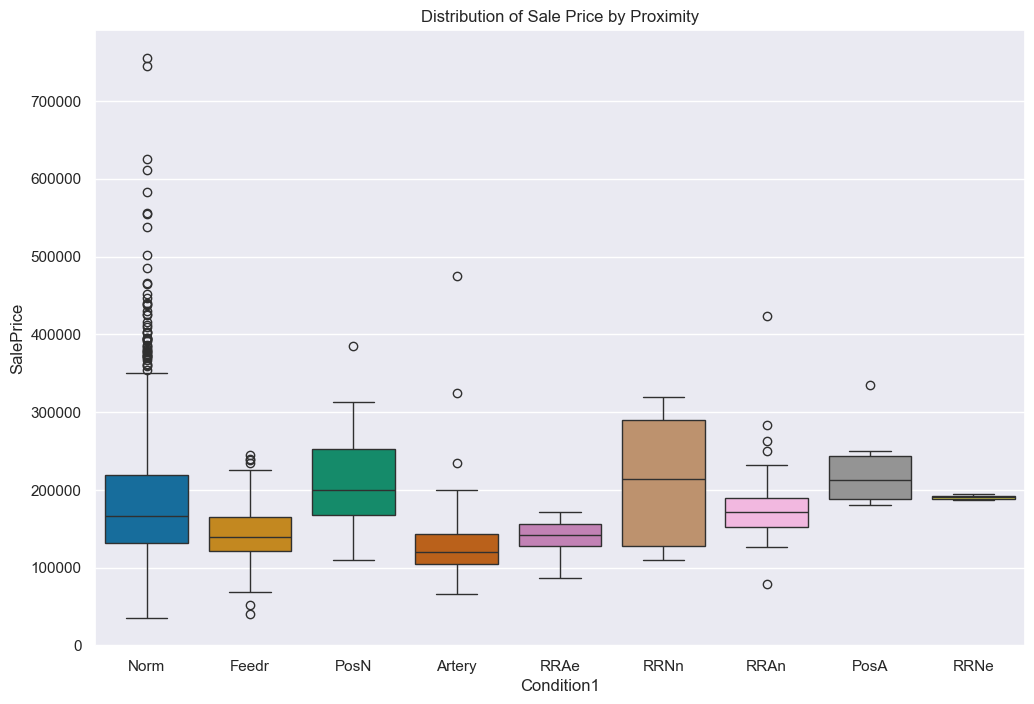

In [ ]:
#Exploring the distrubition of Sales prices by Zones via a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Condition1', y='SalePrice', hue='Condition1',legend=False)
plt.title('Distribution of Sale Price by Proximity')
plt.show()

Properties near positive features (PosN, PosA) and within 200' of North-South Railroad (RRNn) tend to have higher median prices above $200,000.

Properties adjacent to feeder and arterial streets (Feedr, Artery), and adjacent to railroads (RRAn, RRAe, RRNe) have lower median prices.

Properties in a "normal" condition (Norm) have a wide range of prices with many high-price outliers.

#### Feature-Specific Analysis

Analyzing the impact of housing features on Sale prices. Features like house class,lot size, lot area,lot shape, land contour would explored.

- Dwelling Type

Exploring the relationship between housing dwelling classifications and sale price

In [ ]:
# Dictionary mapping of MSSubclass to its description for better visualization
mapping = {
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30: '1-STORY 1945 & OLDER',
    40: '1-STORY W/FINISHED ATTIC ALL AGES',
    45: '1-1/2 STORY - UNFINISHED ALL AGES',
    50: '1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

# Map the values in the DataFrame
df['DwellingTypeDescription'] = df['MSSubClass'].map(mapping)


In [ ]:
df_dwelling=df.groupby('DwellingTypeDescription')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_dwelling

,DwellingTypeDescription,SalePrice
0,2-STORY 1946 & NEWER,215200.0
1,1-STORY PUD (Planned Unit Development) - 1946 ...,192000.0
2,SPLIT OR MULTI-LEVEL,166500.0
3,2-1/2 STORY ALL AGES,163500.0
4,1-STORY 1946 & NEWER ALL STYLES,159500.0
5,2-STORY 1945 & OLDER,156000.0
6,2-STORY PUD - 1946 & NEWER,146500.0
7,1-STORY W/FINISHED ATTIC ALL AGES,142500.0
8,SPLIT FOYER,140750.0
9,DUPLEX - ALL STYLES AND AGES,135960.0


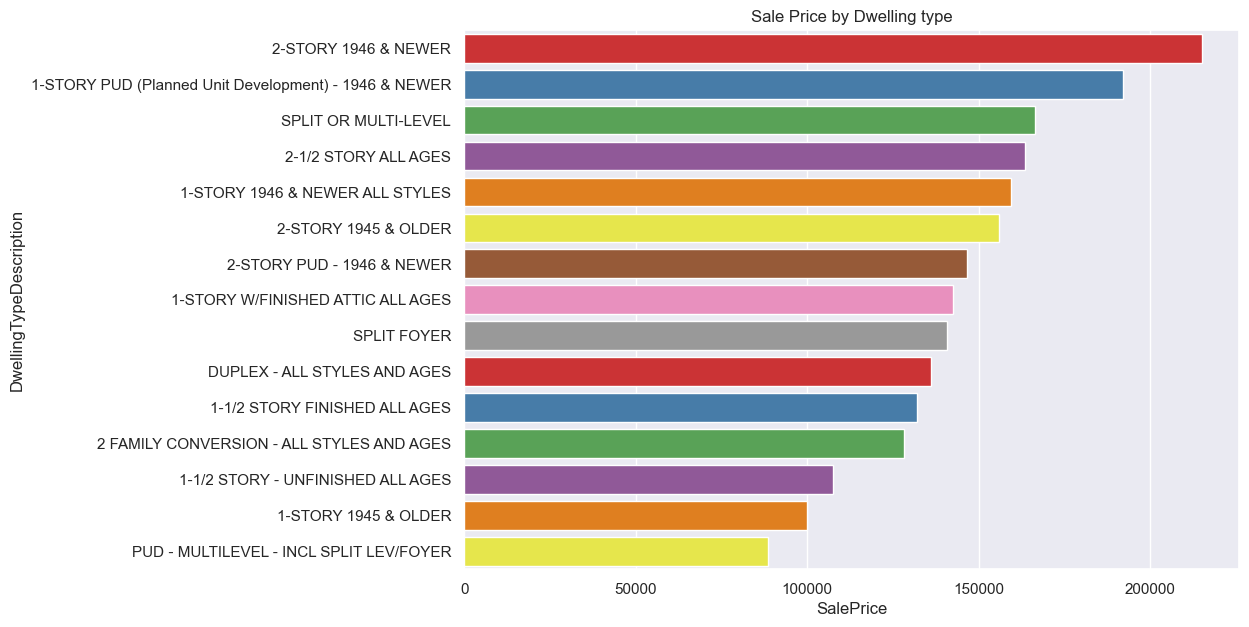

In [ ]:
#visualizing the house price by dwelling type
plt.figure(figsize=(10, 7))
sns.barplot(x='SalePrice', y='DwellingTypeDescription', hue='DwellingTypeDescription', data=df_dwelling,palette='Set1')
plt.title('Sale Price by Dwelling type')
plt.show()

2-STORY 1946 & NEWER have the highest median sale price of $215,200

- Building Qality Rating

exploring how the Quality rating of a building affects its Sale price



In [ ]:
# Mapping dictionary to obtain a house condition rating for better visualization
rating_map = {
    10: 'Very Excellent',
    9: 'Excellent',
    8: 'Very Good',
    7: 'Good',
    6: 'Above Average',
    5: 'Average',
    4: 'Below Average',
    3: 'Fair',
    2: 'Poor',
    1: 'Very Poor'
}
# Apply the mapping
df['Quality Rating'] = df['OverallQual'].map(rating_map)

In [ ]:
#distribution of the dataset based on the Condition rating
df['Quality Rating'].value_counts()

Quality Rating
Average           394
Above Average     373
Good              318
Very Good         168
Below Average     116
Excellent          43
Fair               20
Very Excellent     18
Poor                3
Very Poor           2
Name: count, dtype: int64

Above 50% of the houses on the dataset have an "Average" rating with only 1 building with a *very* poor rating

In [ ]:
#Sale price of Houses based on Rating of the building condition
df_rating=df.groupby('Quality Rating')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_rating

,Quality Rating,SalePrice
0,Very Excellent,432390.0
1,Excellent,345000.0
2,Very Good,269750.0
3,Good,200120.0
4,Above Average,160000.0
5,Average,133000.0
6,Below Average,108000.0
7,Fair,86250.0
8,Poor,60000.0
9,Very Poor,50150.0


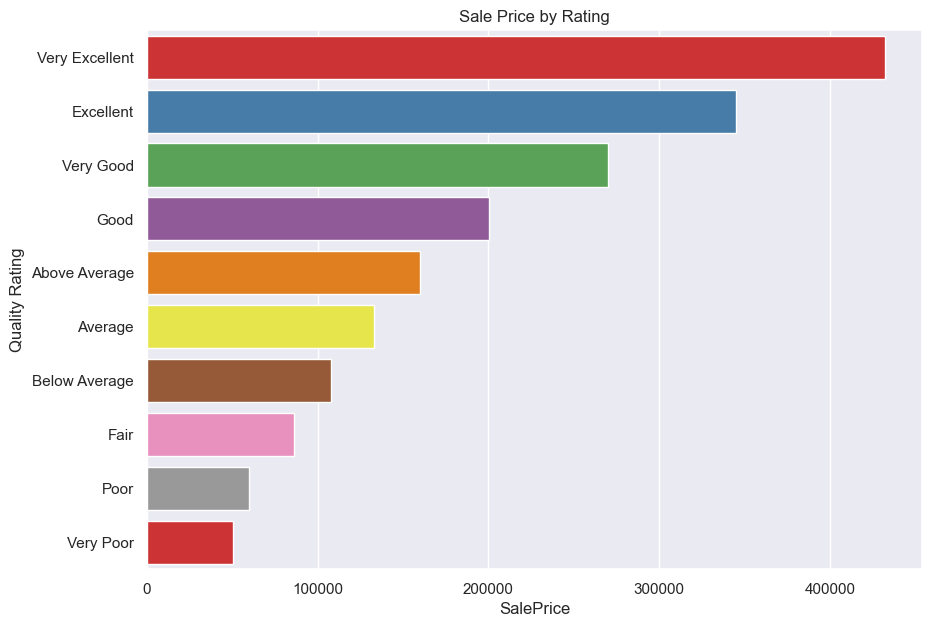

In [ ]:
#visualizing the house price by condition rating
plt.figure(figsize=(10, 7))
sns.barplot(x='SalePrice', y='Quality Rating', hue='Quality Rating', data=df_rating,palette='Set1')
plt.title('Sale Price by Rating')
plt.show()

As expected buildings with high quality rating have a higher median sale price. The rating is has good corrolation with sale price

lets look at the two building with a very poor rating

In [ ]:
#exploring the building with a very poor rating
df[df['Quality Rating']=='Very Poor'][['DwellingTypeDescription','Condition1','MSZoning','Neighborhood','SalePrice']]

,DwellingTypeDescription,Condition1,MSZoning,Neighborhood,SalePrice
375,1-STORY 1945 & OLDER,Norm,RL,Edwards,61000
533,1-STORY 1946 & NEWER ALL STYLES,Norm,RL,BrkSide,39300


- Foundation type

Exploring the effects of the foundation type used for the buiding and its sales price



In [ ]:
#distribution of the dataset based on the foundation type
df['Foundation'].value_counts()

Foundation
PConc     646
CBlock    630
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

Majority of the buildings in the dataset are made up of Conrete, block and tile.

In [ ]:
#Sale price of Houses based on foundation type
df_fdn=df.groupby('Foundation')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_fdn

,Foundation,SalePrice
0,PConc,205000.0
1,Wood,164000.0
2,CBlock,141500.0
3,Stone,126500.0
4,BrkTil,125250.0
5,Slab,104150.0


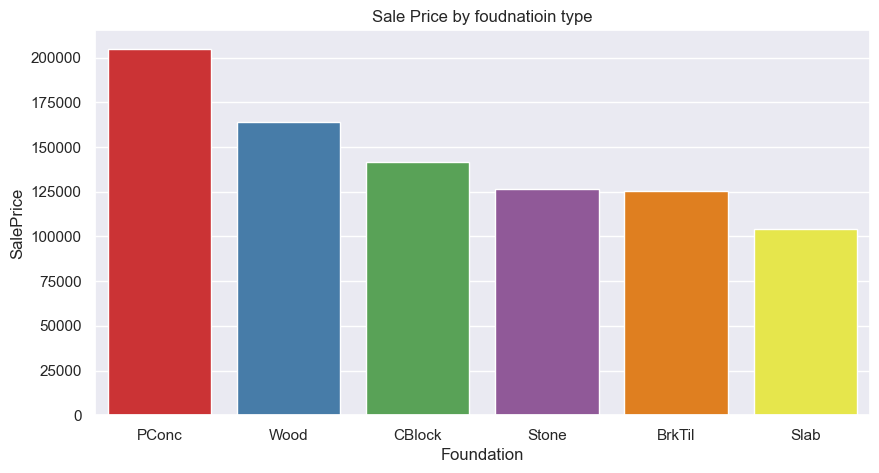

In [ ]:
#visualizing the house price by condition rating
plt.figure(figsize=(10, 5))
sns.barplot(x='Foundation', y='SalePrice', hue='Foundation', data=df_fdn,palette='Set1')
plt.title('Sale Price by foudnatioin type')
plt.show()

Although houses built with wood represent only a small percentage of the dataset, they have a notable median price of $164,000. In contrast, houses constructed with concrete have a higher median price of $205,000.

- Basement Height

Exploring the effect of Basement features on the Sale price

In [ ]:
#Sale price of Houses based on Basement Height
df_bsmt=df.groupby('BsmtQual')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_bsmt

,BsmtQual,SalePrice
0,Ex,318000.0
1,Gd,192070.0
2,TA,135625.0
3,Fa,112000.0
4,None,101800.0



Houses with basements having an "excellent" height (100+ inches) have a median sale price of $318,000, while those without a basement have a much lower median sale price of $101,800. This indicates a significant correlation between basement height and house sale price.

C:\Users\Podos\AppData\Local\Temp\ipykernel_30760\1886253048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BsmtQual', y='SalePrice', palette='Set3')


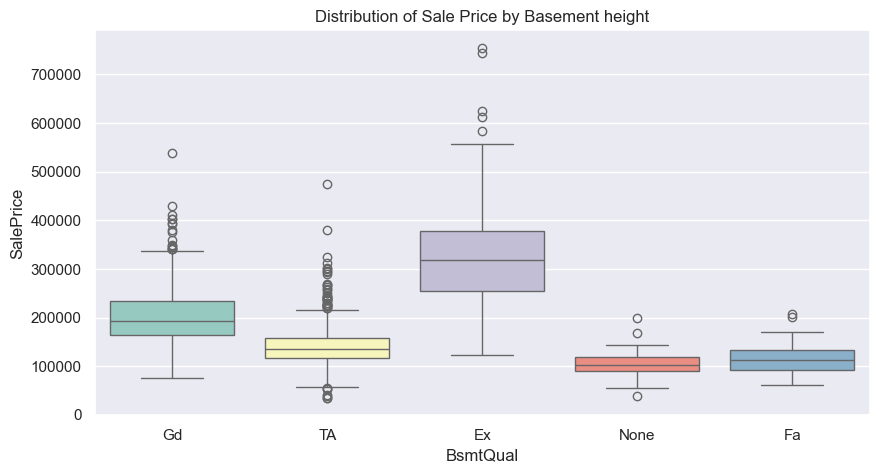

In [ ]:
#Exploring the distrubition of Sales prices by basement height via a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='BsmtQual', y='SalePrice', palette='Set3')
plt.title('Distribution of Sale Price by Basement height')
plt.show()

The boxplot further supports our earlier conclusion about the strong correlation between basement height and house sale price.

- Basement Condition Rating
Exploring the relationship between the rating of basements and the sales price

In [ ]:
#Sale price of Houses based on Basement Condition rating
df_bsmtQ=df.groupby('BsmtCond')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_bsmtQ



,BsmtCond,SalePrice
0,Gd,193879.0
1,TA,165000.0
2,Fa,118500.0
3,None,101800.0
4,Po,64000.0



Surprisingly, houses without basements have a higher median sale price than those with poorly rated basements. However, houses with good quality basements have a median sale price of $193,879.

- Heating  type

Exploring the effect of Heating type of the building and its sales price

In [ ]:
#Sale price of Houses based on Heating type
df_ht=df.groupby('Heating')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_ht

,Heating,SalePrice
0,GasA,164500.0
1,GasW,134950.0
2,OthW,125750.0
3,Wall,91450.0
4,Grav,79000.0
5,Floor,72500.0


Houses with gas forced warm air furnaces have a higher median sale price of $164,500, while those with a floor furnace have the lowest median price of $72,500. Since floor furnaces are typically found in older homes and have largely been replaced by more modern gas forced warm air systems, it is unsurprising that houses with floor furnace heating have the lowest median sale price.

- Central Air Conditioning


Exploring the effect of Air conditioning type of the building and its sales price


In [ ]:
#Sale price of Houses based on Central Air Conditioning
df_ca=df.groupby('CentralAir')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_ca

,CentralAir,SalePrice
0,Y,168250.0
1,N,98000.0


C:\Users\Podos\AppData\Local\Temp\ipykernel_30760\631211664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='CentralAir', y='SalePrice', palette='Set3')


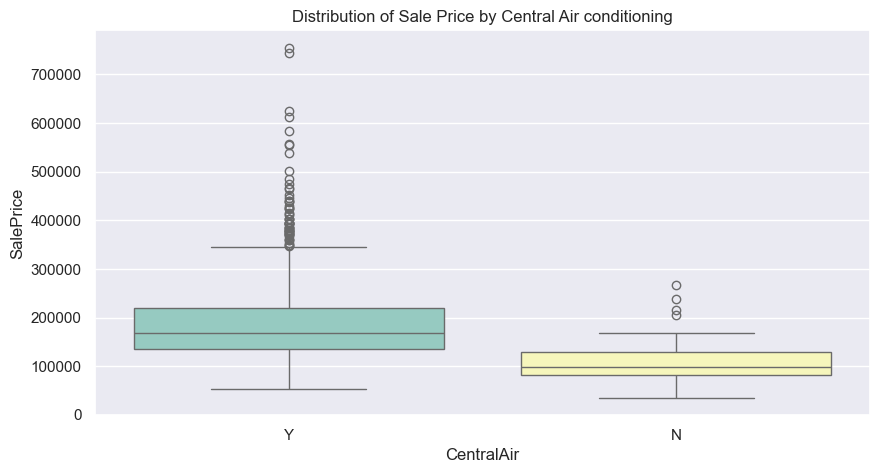

In [ ]:
#Exploring the distrubition of Sales prices by central air conditioning via a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='CentralAir', y='SalePrice', palette='Set3')
plt.title('Distribution of Sale Price by Central Air conditioning')
plt.show()

The box plot shows that properties with central air conditioning generally have higher and more variable sale prices compared to those without it.The median price of houses with central air conditioning is $168,250

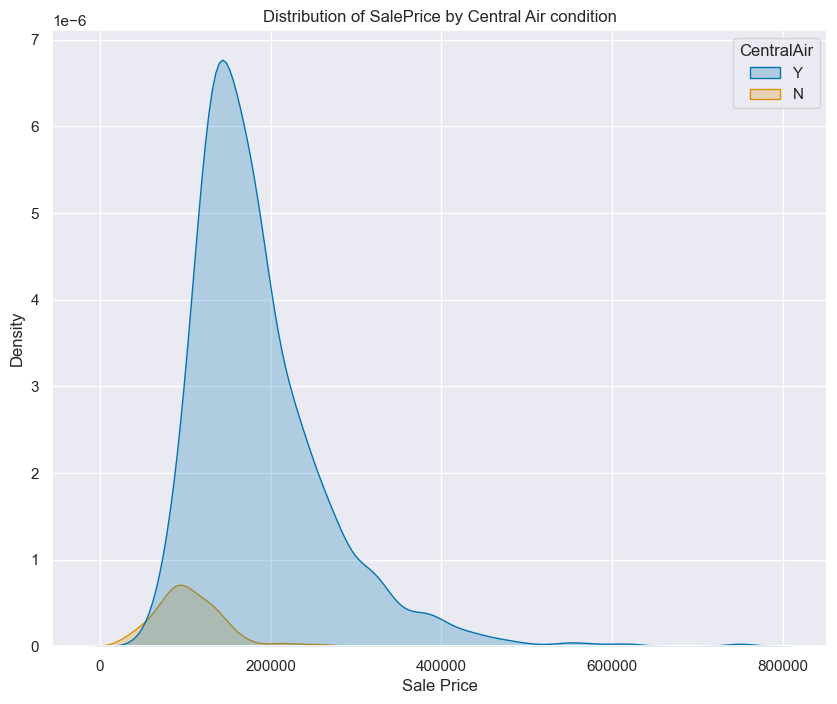

In [ ]:
# Plot distribution of 'Total Charges' with 'Churn Label' as hue
plt.figure(figsize=(10, 8))
sns.kdeplot(df, x='SalePrice', hue='CentralAir',fill=True)
plt.title('Distribution of SalePrice by Central Air condition')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.show()

The KDE plot shows that homes with central air conditioning tend to have higher sale prices, with most clustered around $200,000, compared to homes without central air, which are generally priced lower.

- Roof type

Exploring the effect of Roof type of the building and its sales price

In [ ]:
#Sale price of Houses based on Central Air Conditioning
df_roof=df.groupby('RoofStyle')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_roof

,RoofStyle,SalePrice
0,Shed,260000.0
1,Flat,185000.0
2,Hip,176500.0
3,Mansard,175000.0
4,Gable,160000.0
5,Gambrel,139000.0


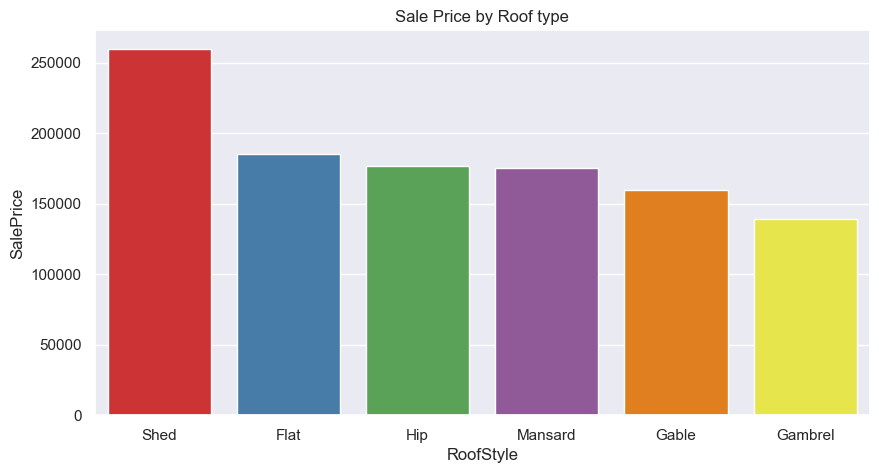

In [ ]:
#visualizing the house price by condition rating
plt.figure(figsize=(10, 5))
sns.barplot(x='RoofStyle', y='SalePrice', hue='RoofStyle', data=df_roof,palette='Set1')
plt.title('Sale Price by Roof type')
plt.show()

Houses with Shed roofs have the highest median sale price at $260,000, followed by those with Flat, Hip, Mansard, Gable, and Gambrel roofs. This suggests that Shed roof houses generally command higher prices compared to other roof styles.

- Roof Material 

Exploring the effect of Roofing material of the building and its sales price

In [ ]:
#Sale price of Houses based on Central Air Conditioning
df_roofM=df.groupby('RoofMatl')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_roofM

,RoofMatl,SalePrice
0,WdShngl,332500.0
1,WdShake,242000.0
2,Membran,241500.0
3,Metal,180000.0
4,Tar&Grv,167000.0
5,CompShg,162000.0
6,ClyTile,160000.0
7,Roll,137000.0


Wood Shingles have the highest median sale price at $332,500, whereas Roll has the lowest median sale price at $137,000. The cost of roofing materials significantly impacts the overall building cost, resulting in higher sale prices.

- Garage Type

Exploring the effect of Garrage type of the building and its sales price


In [ ]:
#Sale price of Houses based on GarageType
df_grg=df.groupby('GarageType')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_grg

,GarageType,SalePrice
0,BuiltIn,230000.0
1,Attchd,185000.0
2,2Types,159000.0
3,Basment,148000.0
4,Detchd,129500.0
5,CarPort,108000.0
6,None,100000.0


Houses without a garage have the lowest median price while houses with a built in Garage have a median price of $230,000.

#### Sale Type and Sale condition

Analysing the effect of Sale type and Sale condition on the Sale Price of houses.

- Sale type

Effect of Sale type on the Sale price

In [ ]:
#Sale price of Houses based on Sale type
df_salet=df.groupby('SaleType')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_salet

,SaleType,SalePrice
0,Con,269600.0
1,New,247453.0
2,CWD,188750.0
3,WD,158000.0
4,ConLw,144000.0
5,ConLD,140000.0
6,COD,139000.0
7,ConLI,125000.0
8,Oth,116050.0


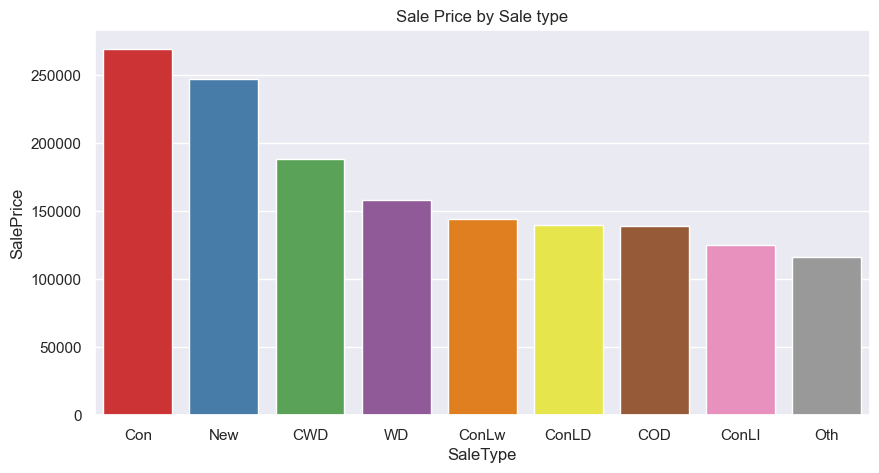

In [ ]:
#visualizing the house price by Sale type
plt.figure(figsize=(10, 5))
sns.barplot(x='SaleType', y='SalePrice', hue='SaleType', data=df_salet,palette='Set1')
plt.title('Sale Price by Sale type')
plt.show()

Houses with a 'Contract with 15% Down payment with regular terms' have a median sale price oof $269,600 closely followed by Newly built houses with a median sale price of $247,453.

- Sale Condition

Effect of sale condition on the Sale price

In [ ]:
#Sale price of Houses based on Sale Condition
df_salec=df.groupby('SaleCondition')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_salec

,SaleCondition,SalePrice
0,Partial,244600.0
1,Normal,160000.0
2,Alloca,148145.0
3,Family,140500.0
4,Abnorml,130000.0
5,AdjLand,104000.0


houses with Partial sale condition have a median sale price of $244,600 while houses with an Adjoining Land Purchase have the least sale price of $104,000.

### 4.2.2 Numeric Variable

Exploring the relationship between the numeric variables and sales price

- Corrolation

Exloring corrolation amongs the numeric features using the Pearson correlation

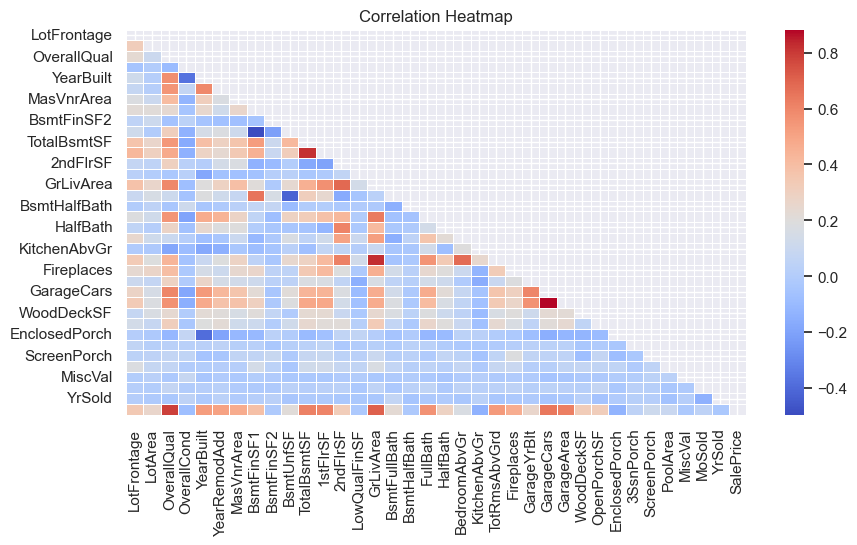

In [ ]:


# Ploting  the heatmap
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()[1:] 

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(10, 5))  # Adjust the size if needed

sns.heatmap(correlation_matrix,mask=mask, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Correlation between the target and Sale Price
df_corr=df[numeric_columns].corr()['SalePrice'].sort_values(ascending=False)[1:].reset_index()
df_corr=df_corr.rename(columns={'index': 'Column', 'SalePrice': 'Coefficient'})
df_corr

,Column,Coefficient
0,OverallQual,0.790999
1,GrLivArea,0.709451
2,GarageCars,0.640529
3,GarageArea,0.623354
4,TotalBsmtSF,0.613649
5,1stFlrSF,0.605796
6,FullBath,0.560223
7,TotRmsAbvGrd,0.535754
8,YearBuilt,0.522736
9,YearRemodAdd,0.506520


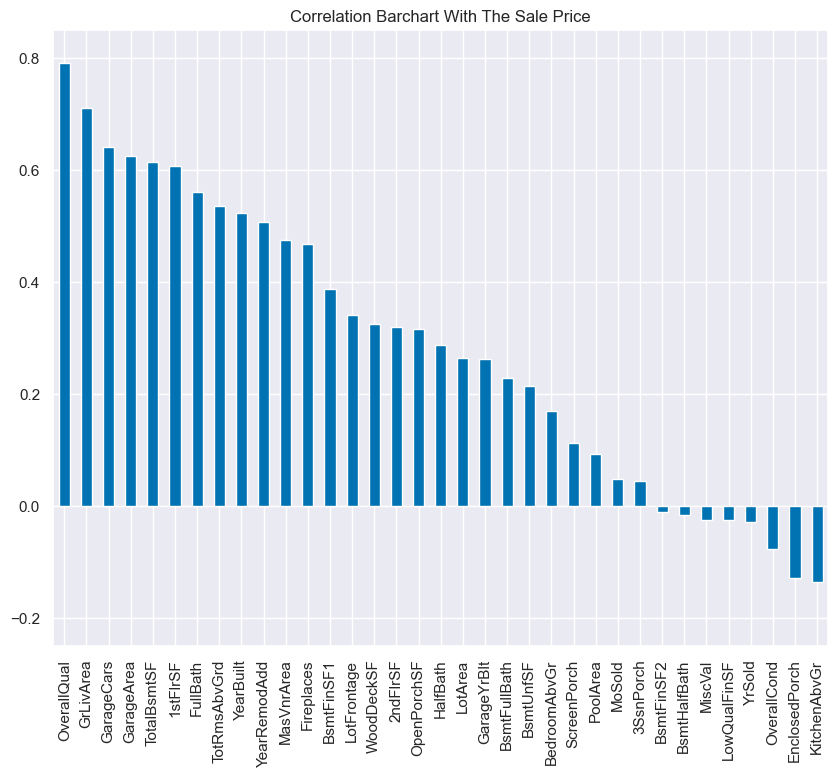

In [ ]:
#Corrolation betwwen the Sale Price and other numeric varibles
plt.figure(figsize=(10, 8))
df[numeric_columns].corr()['SalePrice'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.title("Correlation Barchart With The Sale Price")
plt.ylim(-0.25, 0.85)  # Adjust y-axis limits to include negative values
plt.show()

High Positive Correlations:

OverallQual, GrLivArea, and GarageCars show strong positive correlations with SalePrice. This suggests that higher quality ratings, larger living areas, and more garage space are associated with higher sale prices.
There are strong correlations between similar features, such as GarageArea and GarageCars, 1stFlrSF and TotalBsmtSF, as well as TotRmsAbvGrd and GrLivArea highlighting potential multicollinearity issues among the features.

Moderate to Weak Correlations:

Features like YearBuilt, YearRemodAdd, and FullBath show moderate positive correlations with SalePrice.
Some features, such as LotFrontage and LotArea, have weaker correlations with SalePrice.

Negative Correlations:

There are very few negative correlations, and they tend to be weak. Features like EnclosedPorch have slight negative correlations with SalePrice.

Redundant Features:

The heatmap reveals features that are highly correlated with each other (e.g., GarageArea and GarageCars). These redundant features would be combined or one of them could be dropped to simplify the model.

- OverallQual

The heatmap reveals a strong positive corrolation between OverallQual and Sale price, exploring the relationship further to reveal some posible insights

In [ ]:
#creating a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(y='SalePrice',x='OverallQual', data=df)
# Calculate the line of best fit
slope, intercept = np.polyfit(df['OverallQual'], df['SalePrice'], 1)
regression_line = slope * df['OverallQual'] + intercept

# Plot the regression line

plt.plot(df['OverallQual'], regression_line, color='red')
plt.title("Correlation plot of sales price and OverallQual")
plt.show()

NameError: name 'plt' is not defined

 As the overall quality rating increases, the sale price tends to increase as well, indicating that higher quality houses generally sell for higher price evident in the trend of the scatter plot and alos the corrolation value of 0.79

- GrLivArea: Above grade (ground) living area square feet

Exploring the relationship between the Total house living area (minus basement) and Sale price

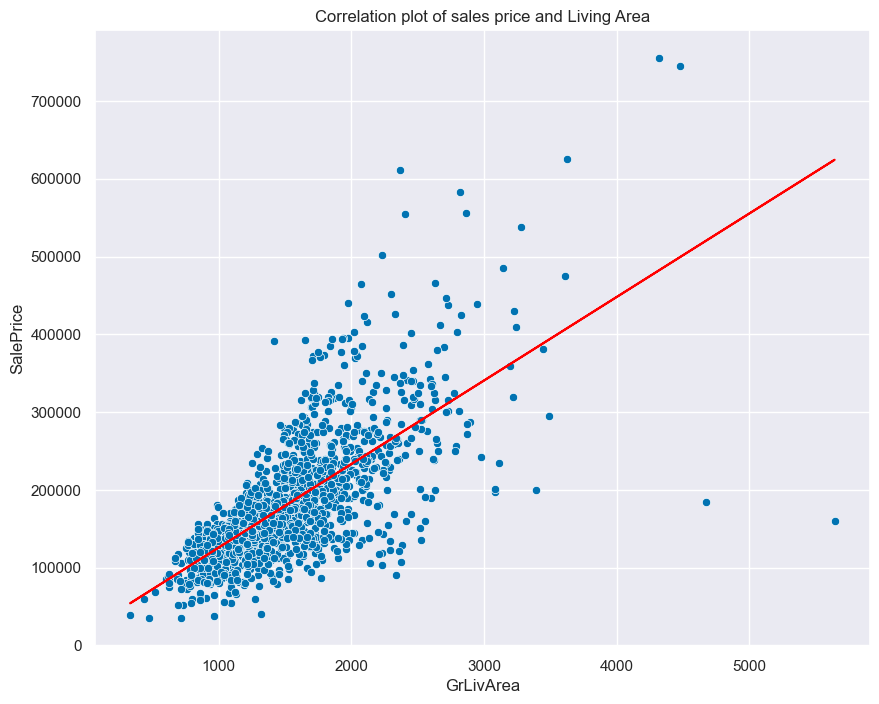

In [ ]:
#creating a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(y='SalePrice',x='GrLivArea', data=df)
# Calculate the line of best fit
slope, intercept = np.polyfit(df['GrLivArea'], df['SalePrice'], 1)
regression_line = slope * df['GrLivArea'] + intercept

# Plot the regression line
plt.plot(df['GrLivArea'], regression_line, color='red')
plt.title("Correlation plot of sales price and Living Area")
plt.show()

The scatterplot reveals that buildings with larger living area tend to have higher sales price evident with the pearson correlation coefficient of 0.71

- Garage Area

Exploring further the positive corrolation between Sale price and garage area

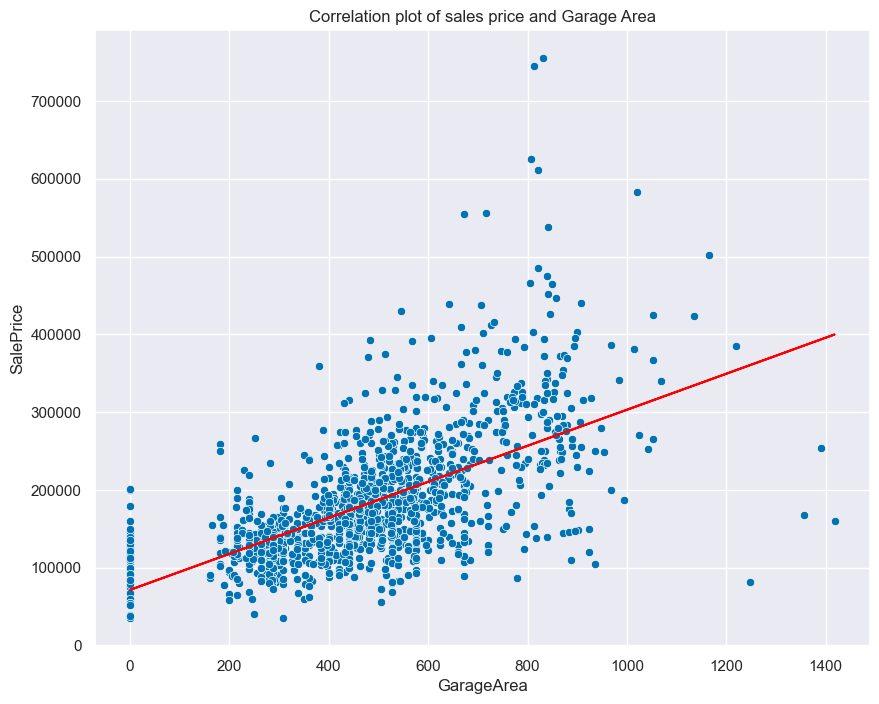

In [ ]:
#creating a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(y='SalePrice',x='GarageArea', data=df)
# Calculate the line of best fit
slope, intercept = np.polyfit(df['GarageArea'], df['SalePrice'], 1)
regression_line = slope * df['GarageArea'] + intercept
plt.plot(df['GarageArea'], regression_line, color='red')
plt.title("Correlation plot of sales price and Garage Area")
plt.show()

Buildings with large garage area tend to have a higher Sale price evident with the corrolation coefficient of 0.62

- Year Built

Exploring the effect of year of construction on sale price

In [ ]:
#Sale price of Houses based on Sale type
df_yearb=df.groupby('YearBuilt')['SalePrice'].agg('median').round().sort_values(ascending=False).reset_index()
df_yearb

,YearBuilt,SalePrice
0,2010,394432.0
1,2008,335000.0
2,1893,325000.0
3,1892,291250.0
4,1989,275000.0
...,...,...
107,1900,104513.0
108,1875,94000.0
109,1930,91000.0
110,1913,90350.0


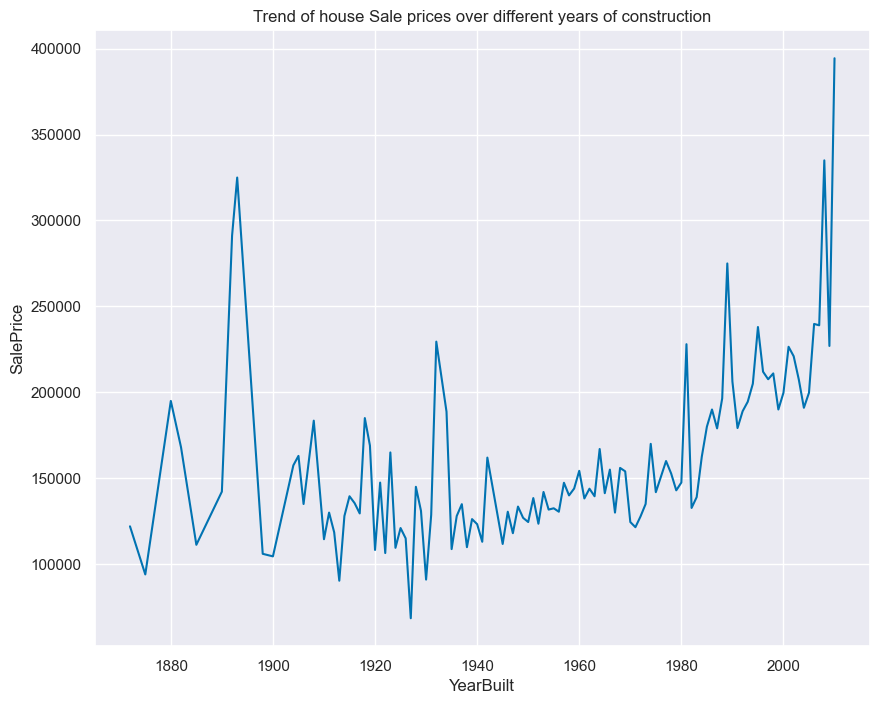

In [ ]:
#creating a line plot
plt.figure(figsize=(10, 8))
sns.lineplot(y='SalePrice',x='YearBuilt', data=df_yearb)
plt.title("Trend of house Sale prices over different years of construction")
plt.show()


The line graph illustrates a general increase in house sale prices over the years, with distinct peaks in the early 1900s and a significant upward trend as the year 2000 approaches. This pattern suggests that newer houses tend to command higher sale prices, reflecting historical market trends and likely improvements in construction quality and amenities over time. The correlation coefficient between SalePrice and YearBuilt is 0.52, indicating that while there is a positive relationship, other factors also play a significant role in determining sale prices.

- Month Sold
exploring the effect of Month of sale on sale price

In [ ]:
# Create a dictionary to map numbers to months for better visualization
month_map = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
df['Months']= df['MoSold'].map(month_map)


In [ ]:
#Sale price of Houses based on Month sold
# Define the order of the months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert the 'Months' column to a categorical type with the specified order
df['Months'] = pd.Categorical(df['Months'], categories=month_order, ordered=True)

# Group by 'Months' and calculating the median 'SalePrice'
df_month = df.groupby('Months')['SalePrice'].agg('median').round().reset_index().sort_values(by="Months")
df_month

C:\Users\Podos\AppData\Local\Temp\ipykernel_30760\1984567636.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_month = df.groupby('Months')['SalePrice'].agg('median').round().reset_index().sort_values(by="Months")


,Months,SalePrice
0,January,151650.0
1,February,173250.0
2,March,165250.0
3,April,147000.0
4,May,154000.0
5,June,163000.0
6,July,165400.0
7,August,173900.0
8,September,185900.0
9,October,159000.0


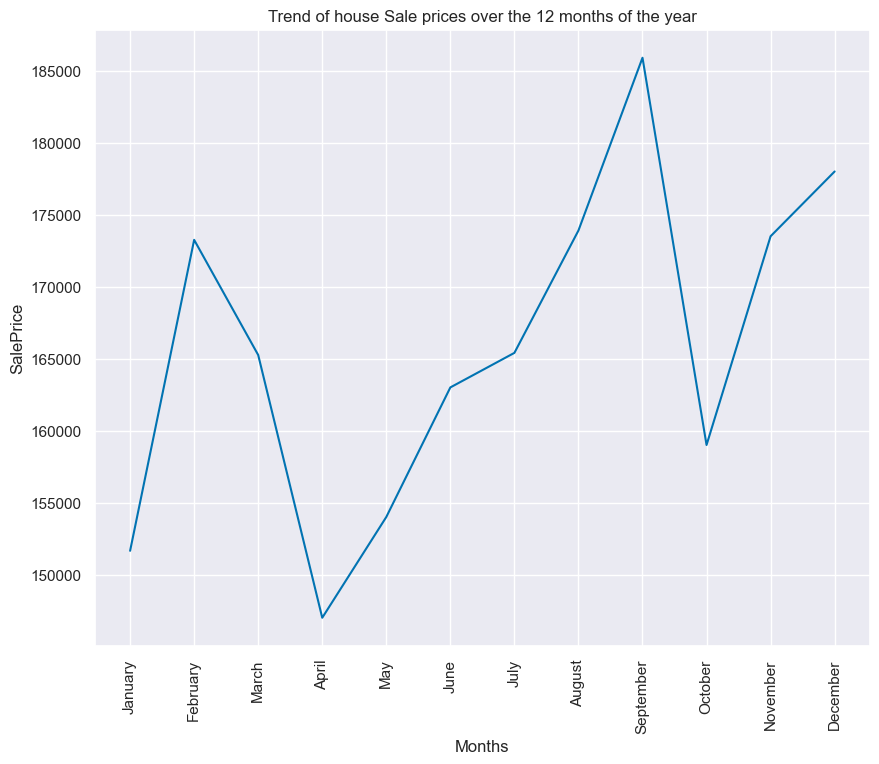

In [ ]:
#creating a line plot to visualize the trend of housprices over the 12 months of theyear
plt.figure(figsize=(10, 8))
sns.lineplot(y='SalePrice',x='Months', data=df_month)
plt.title("Trend of house Sale prices over the 12 months of the year")
plt.xticks(rotation=90)
plt.show()


The line plot shows the trend of house sale prices over the 12 months of the year. Sale prices start lower in January, peak around Febuary, dip in April, and then rise again, reaching the highest point in September. This indicates seasonal variations in house sale prices, with the highest prices typically occurring towards the end of the year. This plots helps both buyers and sellers to determine the best time of the year to buy or sell buildings.

### 4.3 Insights

Summary of Insights from EDA on Sale Prices

- Sale Price Distribution

The sale prices of houses range from $34,900 to $755,000, with an average price of $180,979 and a median of $163,000. Most houses are priced below $200,000, although there is a significant number of outliers at higher prices.

- Neighborhood Influence

Neighborhoods such as NridgHt, NoRidge, and StoneBr consistently appear as high-price areas, while MeadowV, IDOTRR, and BrDale are associated with lower prices.

- Zoning Classification

Houses in the FV (Floating Village Residential) zoning classification have the highest median sale price at $205,950, whereas those in the C (Commercial) zoning classification have the lowest median sale price at $74,700.

- Impact of Location and Accessibility

Properties located near feeder streets, arterial streets, and railroads tend to have lower median sale prices.

- Building Type

Among different building types, 2-STORY 1946 & NEWER buildings have the highest median sale price, with a value of $215,200.

- Building Condition

Houses rated 'Average' in condition have a median price of $185,000, which is higher than those rated 'Excellent'.

- Basement Features

Houses with basements that have a ceiling height of 100+ inches have a median sale price of $318,000. In contrast, houses without basements have a median price of $101,800. Interestingly, houses with poorly rated basements tend to have lower prices than those without basements at all.

- Heating System

Houses equipped with gas-forced warm air furnaces have a higher median sale price of $164,500, while those with floor furnaces have the lowest median price at $72,500.

- Central Air Conditioning

Properties with central air conditioning generally command higher and more variable sale prices, with a median price of $168,250 compared to those without central air conditioning.

- Roof Style and Material

Houses with Shed-style roofs have the highest median sale price at $260,000, followed by other roof styles. The type of roofing material also affects the sale price, with wood shingle roofs having the highest prices and roll roofs the lowest.

- Garage Type

Houses with built-in garages have a higher median sale price of $230,000, whereas those without garages tend to have lower prices.

- Sale Conditions

Properties sold under contracts with a 15% down payment have a median sale price of $269,600, closely followed by newly built houses with a median price of $247,453. On the other hand, houses sold with adjoining land purchases have the lowest median sale price of $104,000.

- Overall Quality

As the overall quality rating of houses increases, the sale price tends to increase as well, indicating that higher quality houses generally sell for higher prices.

- Living Area

The analysis shows that buildings with larger living areas tend to have higher sale prices.

- Garage Area

Similarly, buildings with larger garage areas are associated with higher sale prices.

- Historical and Seasonal Trends

House sale prices have generally increased over time, with noticeable peaks around the early 1900s and a significant upward trend toward the year 2000. This reflects historical market trends and possibly improvements in construction quality and amenities. Additionally, house prices show seasonal variations, with lower prices in January, a peak in February, a dip in April, and the highest prices typically occurring in September. These trends can help both buyers and sellers determine the best time of year to buy or sell properties.


# 5.0 Model Fitting & Evaluation

Predicting Sale Price is a regression problem that can be effectively addressed with  a Linear regression in machine learning. I have selected Linear Regression model as my foundational model. For comparison, I am employing the Random Forest regressor, which is adept at managing outliers and capturing complex, non-linear patterns.

For model evaluation, I am prioritizing the Precision metric because it reduces the occurrence of false positives, ensuring that when a recipe is forecasted to have high traffic, it is indeed highly probable.

## 5.1 Pre-Processing

### 5.1.1 Feature Egngineering

In [ ]:
# creating a copy of my dataset for feature engineering
df_model= df.copy()

- Feature Creation

Creating the Age Column

In [ ]:
#Creating the Age Column at time of sale
df_model['Age']= df_model['YrSold']-df_model['YearBuilt']

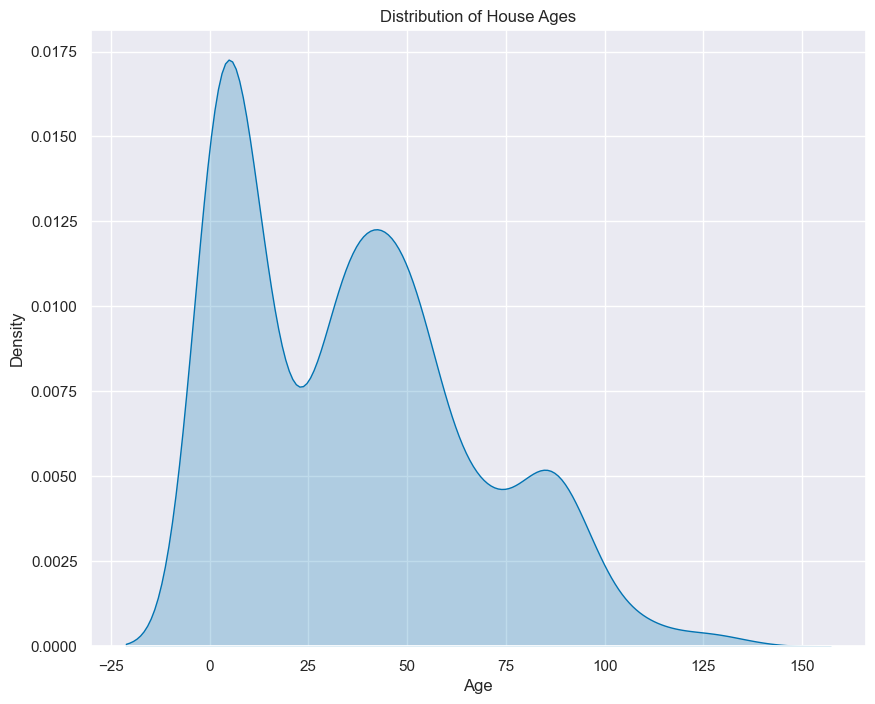

In [ ]:
#exploring the age column
plt.figure(figsize=(10, 8))
sns.kdeplot(df_model['Age'],fill=True)
plt.title("Distribution of House Ages")
plt.show()

The density plot shows a bimodal distribution of ages in the dataset, with two distinct peaks. The first peak is near age 0, indicating a high density of nearly built buildings, and the second, larger peak is around age 40, indicating a high density of midle aged buildings. This suggests the presence of two prominent age groups within the dataset.

In [ ]:
#Obtaining the corrolaton between Age and Sale price
df_model['SalePrice'].corr(df_model['Age'])

-0.5231948436661676

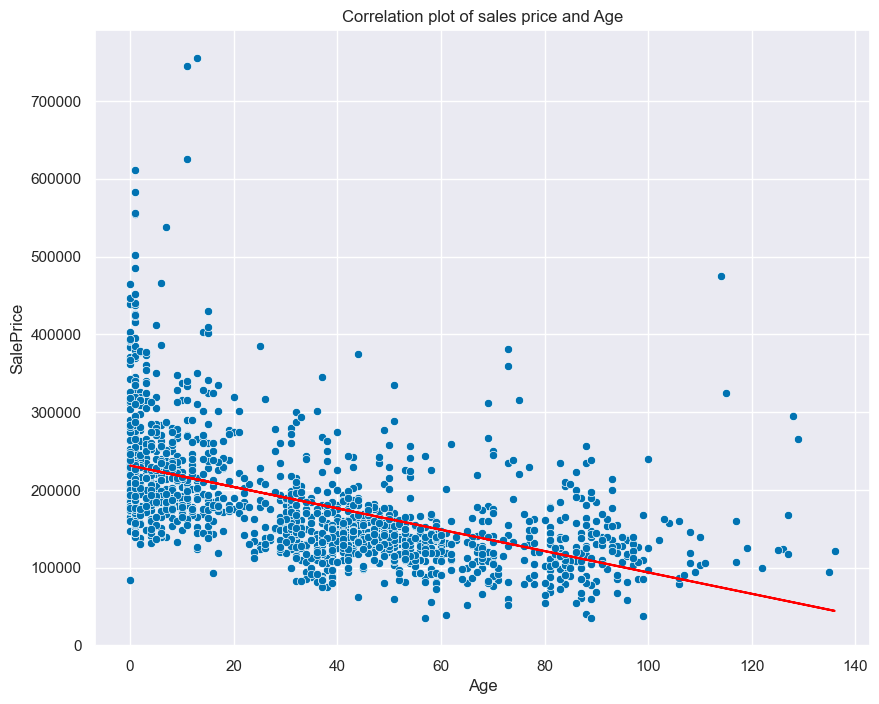

In [ ]:
#exploring the relationship between age and saleprice
#creating a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(y='SalePrice',x='Age', data=df_model)
# Calculate the line of best fit
slope, intercept = np.polyfit(df_model['Age'], df_model['SalePrice'], 1)
regression_line = slope * df_model['Age'] + intercept
plt.plot(df_model['Age'], regression_line, color='red')
plt.title("Correlation plot of sales price and Age")
plt.show()

The scatter plot reinforces our earlier observation that newly built houses generally attract higher sale prices, while older houses tend to be less expensive. However, with a moderate negative correlation coefficient of -0.52, it's clear that other factors significantly influence sale prices.

Creating the Renovated Column

In [ ]:
# Creating new column to indicate if the home is renovated
df_model['Renovated'] = df_model['YearRemodAdd'] > df_model['YearBuilt']

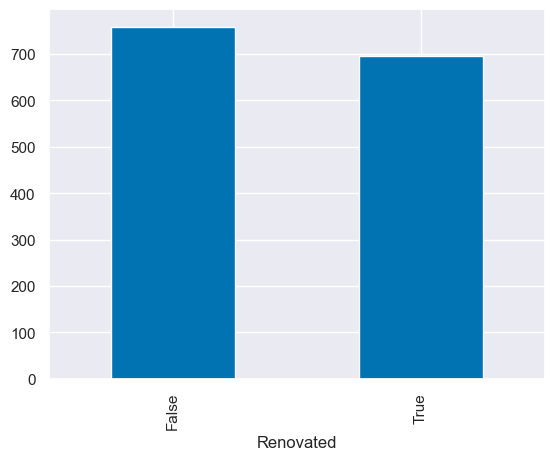

In [ ]:
df_model['Renovated'].value_counts().plot(kind='bar')
plt.show()

The proportion of renovated and non-renovated houses is almost equal to in the dataset.

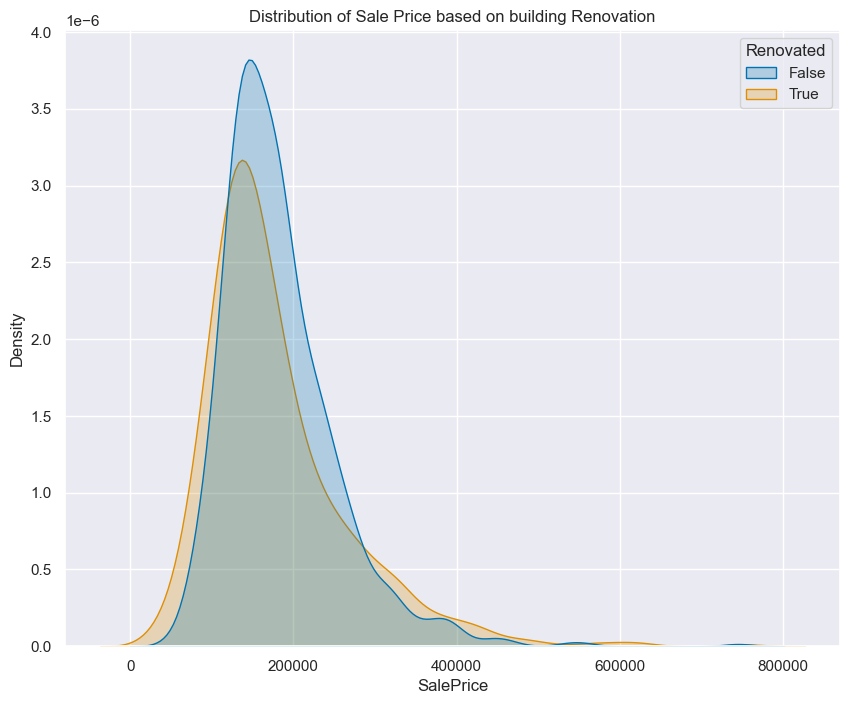

In [ ]:
#Exploring the effect of renovation on the dataset
plt.figure(figsize=(10, 8))
sns.kdeplot(x='SalePrice', hue='Renovated',data=df_model,fill=True)
plt.title('Distribution of Sale Price based on building Renovation')
plt.show()

The plot indicates that while renovation might contribute to a higher sale price, the effect is not overwhelmingly strong, as the distributions for renovated and non-renovated homes are quite similar, with a moderate difference towards higher prices for renovated homes.

- Feature Removal

In [ ]:
#Removing low variance and highly correlated columns to prevent multicollinearity.
columns_to_drop= ['Street','Utilities','LandSlope','GarageCars','HouseStyle','YearRemodAdd','TotRmsAbvGrd','BsmtUnfSF','2ndFlrSF','BsmtFinSF1','DwellingTypeDescription','Condition Rating']
df_model=df_model.drop(columns=columns_to_drop,axis=1)

The plot indicates that while renovation might contribute to a higher sale price, the effect is not overwhelmingly strong, as the distributions for renovated and non-renovated homes are quite similar, with a moderate difference towards higher prices for renovated homes.

#### 5.1.2 Outliers

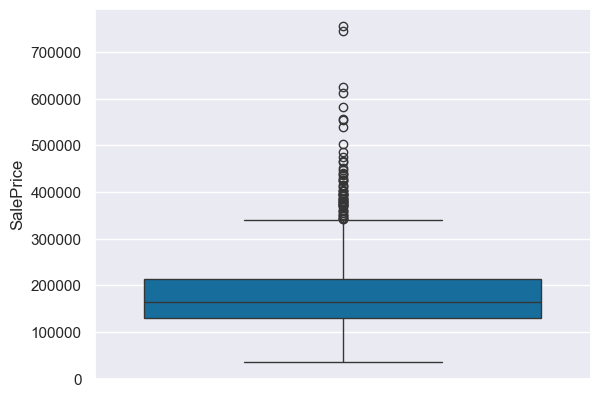

In [ ]:
# plotting a boxplot to visualize the outliers in the SalePrice column
sns.boxplot(df_model.SalePrice)
plt.show()

The boxplot of "SalePrice" reveals that while the majority of home prices range from approximately $150,000 to $250,000, The Outliers start to appear beyond the upper whisker of the boxplot. In this case, the upper whisker extends up to approximately $350,000., with some sale prices reaching up to $700,000, indicating a significant number of homes sold at much higher prices compared to the typical range.

In [ ]:
# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_model['SalePrice'].quantile(0.25)
Q3 = df_model['SalePrice'].quantile(0.75)

# Calculating the IQR
IQR = Q3 - Q1

# Defining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df_model[(df_model['SalePrice'] < lower_bound) | (df_model['SalePrice'] > upper_bound)]

# Display the outliers
outliers

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Quality Rating,Months,Age,Renovated
11,60,RL,85.0,11924,IR1,Lvl,Inside,NridgHt,Norm,Norm,1Fam,9,5,2005,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,Unf,0,1175,GasA,Ex,Y,SBrkr,1182,0,2324,1,0,3,0,4,1,Ex,Typ,2,Gd,BuiltIn,2005.0,Fin,736,TA,TA,Y,147,21,0,0,0,0,0,7,2006,New,Partial,345000,Excellent,July,1,True
53,20,RL,68.0,50271,IR1,Low,Inside,Veenker,Norm,Norm,1Fam,9,5,1981,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,Unf,0,1842,GasA,Gd,Y,SBrkr,1842,0,1842,2,0,0,1,0,1,Gd,Typ,1,Gd,Attchd,1981.0,Fin,894,TA,TA,Y,857,72,0,0,0,0,0,11,2006,WD,Normal,385000,Excellent,November,25,True
58,60,RL,66.0,13682,IR2,HLS,CulDSac,StoneBr,Norm,Norm,1Fam,10,5,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,Unf,0,1410,GasA,Ex,Y,SBrkr,1426,0,2945,0,0,3,1,3,1,Gd,Typ,1,Gd,BuiltIn,2006.0,Fin,641,TA,TA,Y,192,0,37,0,0,0,0,10,2006,New,Partial,438780,Very Excellent,October,0,False
112,60,RL,77.0,9965,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,7,5,2007,Gable,CompShg,VinylSd,VinylSd,Stone,220.0,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,0,1264,GasA,Ex,Y,SBrkr,1282,0,2696,1,0,2,1,4,1,Ex,Typ,1,Gd,BuiltIn,2007.0,Fin,792,TA,TA,Y,120,184,0,0,168,0,0,10,2007,New,Partial,383970,Good,October,0,False
151,20,RL,107.0,13891,Reg,Lvl,Inside,NridgHt,Norm,Norm,1Fam,8,5,2007,Hip,CompShg,VinylSd,VinylSd,Stone,436.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,Unf,0,1710,GasA,Ex,Y,SBrkr,1710,0,1710,1,0,2,0,2,1,Gd,Typ,1,Gd,Attchd,2007.0,RFn,866,TA,TA,Y,0,102,0,0,0,0,0,1,2008,New,Partial,372402,Very Good,January,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,50,RL,72.0,14100,IR1,Lvl,Inside,Crawfor,Norm,Norm,1Fam,8,9,1935,Gable,CompShg,Stucco,Stucco,BrkFace,632.0,TA,Gd,CBlock,TA,TA,Mn,Rec,Unf,0,728,GasA,Ex,Y,SBrkr,1968,0,3447,0,0,3,1,4,1,Gd,Typ,2,Gd,BuiltIn,1982.0,Unf,1014,TA,TA,Y,314,12,0,0,0,0,0,5,2008,WD,Normal,381000,Very Good,May,73,True
1353,50,RL,56.0,14720,IR1,Lvl,CulDSac,NoRidge,Norm,Norm,1Fam,8,5,1995,Hip,CompShg,VinylSd,VinylSd,BrkFace,579.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,0,2033,GasA,Ex,Y,SBrkr,2053,0,3238,1,0,2,1,4,1,Gd,Typ,1,Ex,Attchd,1996.0,Fin,666,TA,TA,Y,283,86,0,0,0,0,0,3,2010,WD,Normal,410000,Very Good,March,15,True
1373,20,RL,72.0,11400,Reg,Lvl,Inside,NoRidge,Norm,Norm,1Fam,10,5,2001,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,0,2633,GasA,Ex,Y,SBrkr,2633,0,2633,1,0,2,1,2,1,Ex,Typ,2,Gd,Attchd,2001.0,RFn,804,TA,TA,Y,314,140,0,0,0,0,0,3,2007,WD,Normal,466500,Very Excellent,March,6,True
1388,20,RL,42.0,14892,IR1,HLS,CulDSac,Gilbert,Norm,Norm,1Fam,9,5,2006,Gable,CompShg,VinylSd,VinylSd,Stone,160.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,0,1746,GasA,Ex,Y,SBrkr,1746,0,1746,1,0,2,0,3,1,Ex,Typ,2,Gd,Attchd,2006.0,Fin,758,TA,TA,Y,201,39,0,0,0,0,0,10,2009,WD,Normal,377500,Excellent,October,3,True


Upon exploration, it was discovered tha we have 61 outliers which represent luxery homes. The outliers would be capped using the upper quantile

In [ ]:
# Capping SalePrice outliers
upper_bound = df_model['SalePrice'].quantile(0.99)
df_model['SalePrice'] = np.where(df_model['SalePrice'] > upper_bound, upper_bound, df['SalePrice'])

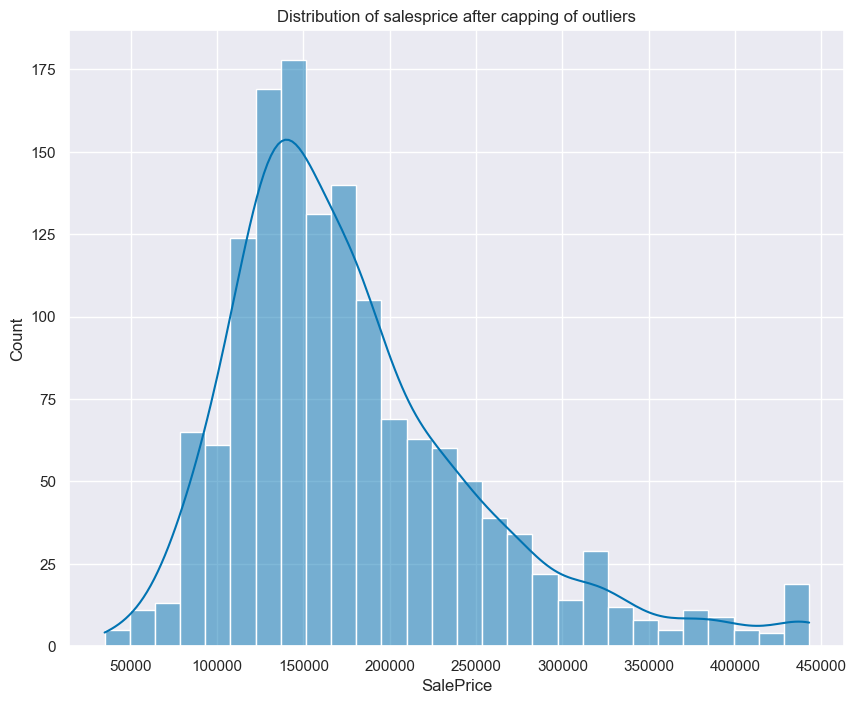

In [ ]:
#visualizing the distributio of sales price
plt.figure(figsize=(10, 8))
sns.histplot(df_model['SalePrice'],kde=True)
plt.title('Distribution of salesprice after capping of outliers')
plt.show()

### 5.1.3 One Hot encoding

In [ ]:
#applying one-hot encoding
df_model=pd.get_dummies(df_model,dtype=int)

### 5.1.4 Train-Test Split

In [ ]:
#defining the Target and features
y= df_model['SalePrice']
X= df_model.drop('SalePrice',axis=1)
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)


### 5.1.5 Normalization

In [ ]:
#Normalization of the freatures using a StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

### 5.2 Linear Regression Model

- Model instatiation

In [ ]:
#Expatiating the Linear regression model
lg=LinearRegression()
#Training our model on the training set
lg.fit(X_train,y_train)

LinearRegression()

- Model Evaluation

In [ ]:
# Predict on the test set (log scale)
y_pred_lg = lg.predict(X_test)
# Evaluate the model
mse, rmse, r2 = evaluate_model(y_test, y_pred_lg)

Mean Squared Error (MSE): 1339008119.90
Root Mean Squared Error (RMSE): 36592.46
R-squared (R²): 0.75


R-squared (R²) = 0.75

The R² value of 0.75 means that approximately 72% of the variance in the target variable (SalePrice) is explained by the independent variables in the model. While 0.72 is not extremely low, it suggests that the model may not be capturing all the relevant patterns in the data. There might be other factors influencing the target variable that are not included in the model, or the relationship between the features and the target might be more complex than what a linear model can capture.

RMSE = 36,592.46

The Root Mean Squared Error (RMSE) is a measure of the average magnitude of the prediction error in the same units as the target variable. An RMSE of 36,592.46 means that, on average, your model's predictions are off by about $36,592.46.This relatively high error indicates that the model's predictions are not very accurate. It suggests that there could be significant discrepancies between the actual and predicted values.

MSE = 1,339,008,119.90

The Mean Squared Error (MSE) is the average of the squared differences between actual and predicted values. It is more sensitive to outliers because errors are squared. An MSE of 1.34 billion indicates substantial variance in the errors.
Such a high MSE further supports the notion that the model is not performing well.


### 5.3 Random Forest Model

- Model Instatiation

In [ ]:
# Initialize the Random Forest classifier
rf = RandomForestRegressor(n_estimators=100,max_depth=8,min_samples_leaf=2,random_state=SEED)
# Fit the model to your data
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf.predict(X_test_scaled)
# Evaluate the model
mse, rmse, r2 = evaluate_model(y_test, y_pred_rf)

Mean Squared Error (MSE): 760951112.60
Root Mean Squared Error (RMSE): 27585.34
R-squared (R²): 0.85


R-squared (R²) = 0.85

The R² value of 0.85 means that approximately 85% of the variance in the target variable (SalePrice) is explained by the independent variables in the model. This is a significant improvement from the base linear model of 0.75 due to the random forest model being an emsemble model.

RMSE = 27,585.34

An RMSE of $27,585.34 indicates that, on average, the model's predictions deviate from the actual values by approximately $27,585.34. While this represents a notable improvement over the baseline linear model, it still falls short of the key performance indicator (KPI) target of $25,000.

MSE = 760,951,112.60

An MSE of 760,951,112.60 in comparison to the base linear model sujest the models ability to capture explain the variance in the dataset

### 5.4 xgboost Model

- Model instatiation

In [ ]:
# Initialize the XGBoost model
xgboost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

- Model Evaluation

In [ ]:

# Predict on the test set
y_pred_xg = xgboost_model.predict(X_test)

# Evaluate the model
mse, rmse, r2 = evaluate_model(y_test, y_pred_xg)

Mean Squared Error (MSE): 539732170.43
Root Mean Squared Error (RMSE): 23232.14
R-squared (R²): 0.90


R-squared (R²) = 0.90

The R² value of 0.90 means that approximately 90% of the variance in the target variable (SalePrice) is explained by the independent variables in the model. This is a good improvement from the base random forest model of 0.85.

RMSE = 23,232.14

An RMSE of $23,232.14 indicates that, on average, the model's predictions deviate from the actual values by approximately $23,232.14. this meets the key performance indicator (KPI) target of $25,000.

MSE = 539,732,170.43

An MSE of 539,732,170.43 indicates our model is adept at dealing with the variance in our dataset

- Model Hyperparameter tuning

In [ ]:
# Define the model
model = xgb.XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {grid_search.best_score_}")

# Best model
best_model = grid_search.best_estimator_


- Checking for overfitting

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)

# Define the model
model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=SEED)

# Train the model with an evaluation set
eval_set = [(X_train_split, y_train_split), (X_val_split, y_val_split)]
model.fit(X_train_split, y_train_split, eval_set=eval_set, verbose=True)

# Predict on the training set
train_predictions = model.predict(X_train_split)
train_mse = mean_squared_error(y_train_split, train_predictions)
train_rmse = np.sqrt(train_mse)

# Predict on the validation set
val_predictions = model.predict(X_val_split)
val_mse = mean_squared_error(y_val_split, val_predictions)
val_rmse = np.sqrt(val_mse)

print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")



[0]	validation_0-rmse:70914.51452	validation_1-rmse:65231.05365
[1]	validation_0-rmse:65931.38946	validation_1-rmse:60690.24051
[2]	validation_0-rmse:61447.59016	validation_1-rmse:56480.75915
[3]	validation_0-rmse:57427.76664	validation_1-rmse:52855.57144
[4]	validation_0-rmse:53843.80907	validation_1-rmse:49592.67224
[5]	validation_0-rmse:50544.96380	validation_1-rmse:46571.73874
[6]	validation_0-rmse:47681.14042	validation_1-rmse:44044.03788
[7]	validation_0-rmse:45101.94236	validation_1-rmse:41757.39394
[8]	validation_0-rmse:42772.61522	validation_1-rmse:39485.12172
[9]	validation_0-rmse:40653.33733	validation_1-rmse:37615.59031
[10]	validation_0-rmse:38833.61617	validation_1-rmse:35906.36110
[11]	validation_0-rmse:37008.10967	validation_1-rmse:34361.14077
[12]	validation_0-rmse:35469.91542	validation_1-rmse:33108.03441
[13]	validation_0-rmse:33952.25332	validation_1-rmse:31722.26607
[14]	validation_0-rmse:32602.87994	validation_1-rmse:30489.59275
[15]	validation_0-rmse:31372.26485	

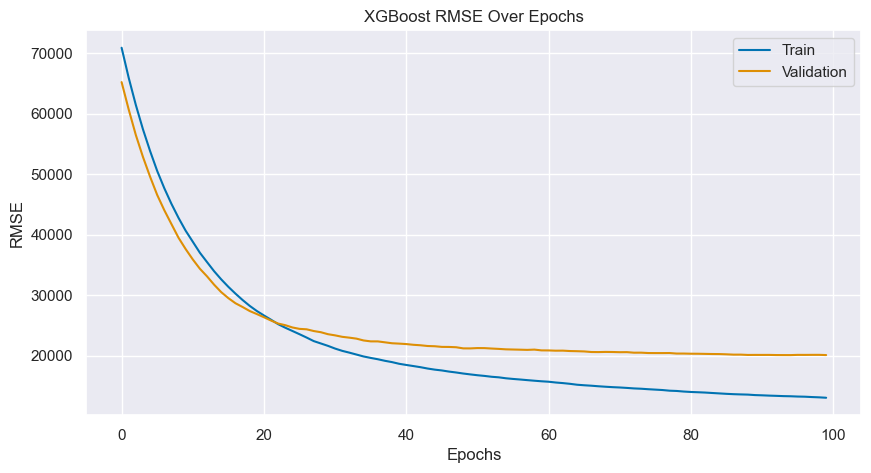

In [ ]:

# Generate learning curves
results = model.evals_result()

epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot learning curves
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation')
plt.title('XGBoost RMSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

The model seems to be performing well, with no significant signs of overfitting. The RMSE values suggest that the model is capable of generalizing to new data reasonably well.The model is well-trained.

- Feature Importance

Checking the features that contiributed the most to the model performance

In [ ]:

# Initialize the XGBoost model
model = xgb.XGBRegressor()

# Perform RFE with XGBoost as the estimator
rfe = RFE(estimator=model, n_features_to_select=15, verbose=1)
rfe.fit(X_train, y_train)

# Predict and calculate the R-squared score on the test set
print(f"R-squared Score: {r2_score(y_test, rfe.predict(X_test))}")

# After fitting RFE, the estimator inside RFE is fitted, so we need to access it directly
# Refit the model on the entire training data using only the selected features
selected_features = X_train.columns[rfe.support_]
model.fit(X_train[selected_features], y_train)

# Extract feature importances from the fitted model
importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': model.feature_importances_.round(2)
})
importance

Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
Fitting estimator with 282 features.
Fitting estimator with 281 features.
Fitting estimator with 280 features.
Fitting estimator with 279 features.
Fitting estimator with 278 features.
Fitting estimator with 277 features.
Fitting estimator with 276 features.
Fitting estimator with 275 features.
Fitting estimator with 274 features.
Fitting estimator with 273 features.
Fitting estimator with 272 features.
Fitting estimator with 271 features.
Fitting estimator with 270 features.
Fitting estimator with 269 features.
Fitting estimator with 268 features.
Fitting estimator with 267 features.
Fitting estimator with 266 features.
Fitting estimator with 265 features.
Fitting estimator with 264 features.
Fitting estimator with 263 features.
Fitting estimator with 262 features.
Fitting estimator with 261 features.
F

,Feature,Importance
0,OverallQual,0.40
1,TotalBsmtSF,0.02
2,GrLivArea,0.05
3,BsmtFullBath,0.03
4,KitchenAbvGr,0.03
5,MSZoning_RM,0.04
6,LotShape_Reg,0.03
7,Neighborhood_Crawfor,0.02
8,BsmtQual_Ex,0.20
9,BsmtQual_Gd,0.03


                 Feature  Importance
0            OverallQual        0.40
1            TotalBsmtSF        0.02
2              GrLivArea        0.05
3           BsmtFullBath        0.03
4           KitchenAbvGr        0.03
5            MSZoning_RM        0.04
6           LotShape_Reg        0.03
7   Neighborhood_Crawfor        0.02
8            BsmtQual_Ex        0.20
9            BsmtQual_Gd        0.03
10       BsmtExposure_Gd        0.04
11          CentralAir_N        0.03
12        KitchenQual_Gd        0.03
13        Functional_Typ        0.03
14          SaleType_New        0.02


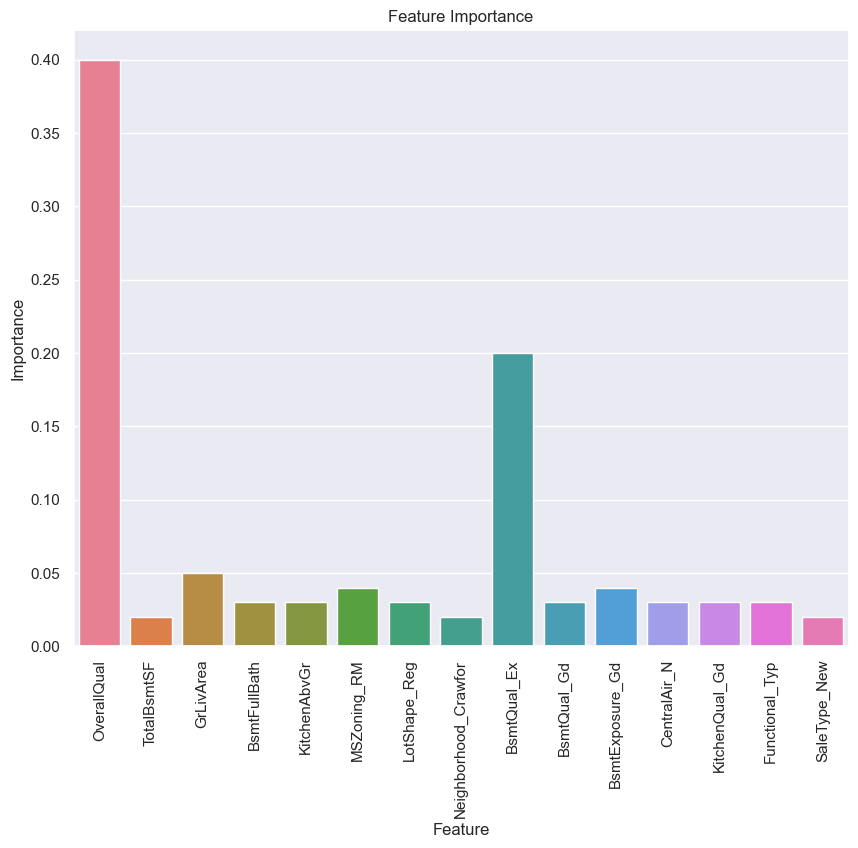

In [ ]:
# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Feature', y='Importance', data=importance,hue='Feature',legend=False)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()



# 6.0 Business Recommendations

To effectively predict house prices and achieve a minimum accuracy of 85% and RMSE of $25,000, the real estate company should focus on the following recommendations for model deployment:

- Track Model Accuracy: 

Regularly monitor the accuracy score of the model’s predictions to assess the variance between the predicted and actual sale prices. This will help in managing the error in quoted sale prices.

- Set a Target RMSE:

 Given that the XGBoost model currently has an RMSE of $23,232, it’s advisable to set a target RMSE around $25,000. This target accounts for potential overfitting and changes in data trends once the model is in use.

- Adjust Based on Performance:

 As data collection continues and the model’s performance is evaluated in real-world scenarios, adjust the RMSE target as needed. If the model consistently meets or exceeds the current target, consider raising the target to align with advancements in model accuracy or evolving business needs.